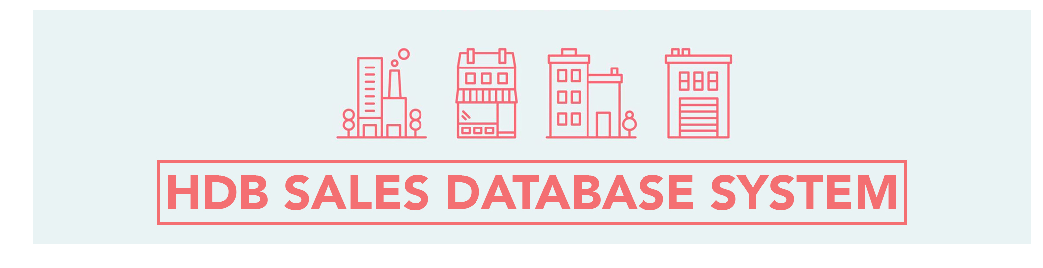

                    What information do you want to check?                    

 [1]Numerical data                 [2]Graphical data                   [0]Exit


Enter the corresponding choice number: 2


                               Which graph would you like to see?                                

 [1]Resale Price by Town      [2]Accumulated Sales Volume by Town      [3]Resale Price by Storey Range
 [4]Sales Ratio by Flat Type  [5]Sales Price/Storey-range Relationship [6]Resale Price Range
 [7]Numeric Data              [0]Exit

                                 Based on available data 

Enter the corresponding choice number: 6


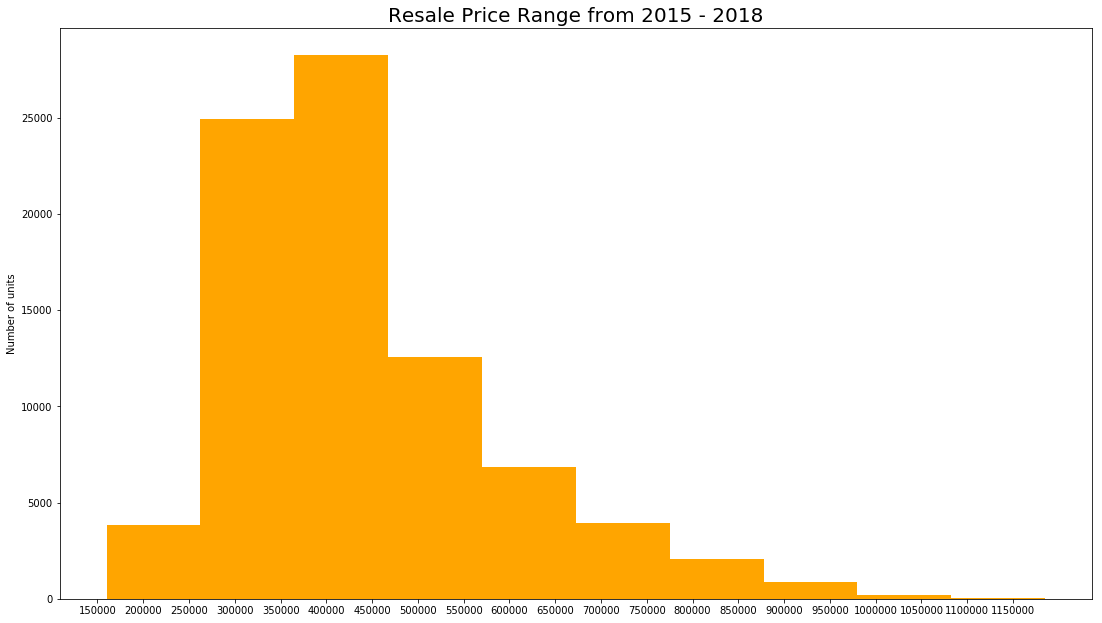




                               Which graph would you like to see?                                

 [1]Resale Price by Town      [2]Accumulated Sales Volume by Town      [3]Resale Price by Storey Range
 [4]Sales Ratio by Flat Type  [5]Sales Price/Storey-range Relationship [6]Resale Price Range
 [7]Numeric Data              [0]Exit

                                 Based on available data 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
%matplotlib inline

### Read the csv file with the loadtxt() function
fname = "data/resale-flat-prices-based-on-registration-date-from-jan-2015-onwards.csv"
data = np.loadtxt(fname, skiprows=1,dtype=[('month','U50'), ('town','U50'), ('flat_type','U50'), 
                                           ('block','U50'), ('street_name','U50'), ('storey_range','U50'),
                                           ('floor_area_sqm','f'), ('flat_model','U50'), 
                                           ('lease_commence_date','i8'), ('remaining_lease','i8'), 
                                           ('resale_price','f')],delimiter=",")

data_month = data[ 'month'] # Just extract the month column
data_town = data[ 'town' ]  # Just extract the town column
data_flat_type = data[ 'flat_type' ]  # Just extract the flat_type column
data_block = data[ 'block' ]  # Just extract the block column
data_street_name = data[ 'street_name' ]  # Just extract the street_name column
data_storey_range = data[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm = data[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model = data[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date = data[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease = data[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price = data[ 'resale_price' ]  # Just extract the resale_price column

unique_towns = np.unique(data_town)   # Get the unique values in this column

data_storey_range_sort = data_storey_range.sort()

### Extract only the rows with “1 ROOM" in the “flat_type” column
keyword = '1 ROOM'
column_to_search = data['flat_type']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_1Room = data[out]

### Extract only the rows with “2 ROOM" in the “flat_type” column
keyword = '2 ROOM'
column_to_search = data['flat_type']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_2Room = data[out]

### Extract only the rows with “3 ROOM" in the “flat_type” column
keyword = '3 ROOM'
column_to_search = data['flat_type']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_3Room = data[out]

### Extract only the rows with “4 ROOM" in the “flat_type” column
keyword = '4 ROOM'
column_to_search = data['flat_type']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_4Room = data[out]

### Extract only the rows with “5 ROOM" in the “flat_type” column
keyword = '5 ROOM'
column_to_search = data['flat_type']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_5Room = data[out]

### Extract only the rows with “EXECUTIVE" in the “flat_type” column
keyword = 'EXECUTIVE'
column_to_search = data['flat_type']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_Executive = data[out]

### Extract only the rows with “MULTI-GENERATION" in the “flat_type” column
keyword = 'MULTI-GENERATION'
column_to_search = data['flat_type']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_MultiGen = data[out]

unique_type = np.unique(data_flat_type)

# Find the highest and lowest resale price
max_Resale = data_resale_price.max()
min_Resale = data_resale_price.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale = np.where(data_resale_price == max_Resale)
index_min_Resale = np.where(data_resale_price == min_Resale)

max_location = data_town[index_max_Resale]
max_floor_area_sqm = data_floor_area_sqm[index_max_Resale]
max_flat_model = data_flat_model[index_max_Resale]
max_flat_type = data_flat_type[index_max_Resale]
max_remaining_lease = data_remaining_lease[index_max_Resale]
max_month = data_month[index_max_Resale]
max_storey_range = data_storey_range[index_max_Resale]

min_location = data_town[index_min_Resale]
min_floor_area_sqm = data_floor_area_sqm[index_min_Resale]
min_flat_model = data_flat_model[index_min_Resale]
min_flat_type = data_flat_type[index_min_Resale]
min_remaining_lease = data_remaining_lease[index_min_Resale]
min_month = data_month[index_min_Resale]
min_storey_range = data_storey_range[index_min_Resale]


### Extract only the rows with “ANG MO KIO" in the “town” column
keyword = 'ANG MO KIO'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_AMK = data[out]

### Data clean up for AMK data
data_month_AMK = data_AMK[ 'month'] # Just extract the month column
data_town_AMK = data_AMK[ 'town' ]  # Just extract the town column
data_flat_type_AMK = data_AMK[ 'flat_type' ]  # Just extract the flat_type column
data_block_AMK = data_AMK[ 'block' ]  # Just extract the block column
data_street_name_AMK = data_AMK[ 'street_name' ]  # Just extract the street_name column
data_storey_range_AMK = data_AMK[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_AMK = data_AMK[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_AMK = data_AMK[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_AMK = data_AMK[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_AMK = data_AMK[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_AMK = data_AMK[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in AMK
max_Resale_AMK = data_resale_price_AMK.max()
min_Resale_AMK = data_resale_price_AMK.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_AMK = np.where(data_resale_price_AMK == max_Resale_AMK)
index_min_Resale_AMK = np.where(data_resale_price_AMK == min_Resale_AMK)

max_Resale_Location_AMK = data_town_AMK[index_max_Resale_AMK]
max_floor_area_sqm_AMK = data_floor_area_sqm_AMK[index_max_Resale_AMK]
max_flat_model_AMK = data_flat_model_AMK[index_max_Resale_AMK]
max_flat_type_AMK = data_flat_type_AMK[index_max_Resale_AMK]
max_remaining_lease_AMK = data_remaining_lease_AMK[index_max_Resale_AMK]
max_month_AMK = data_month_AMK[index_max_Resale_AMK]
max_storey_range_AMK = data_storey_range_AMK[index_max_Resale_AMK]

min_Resale_Location_AMK = data_town_AMK[index_min_Resale_AMK]
min_floor_area_sqm_AMK = data_floor_area_sqm_AMK[index_min_Resale_AMK]
min_flat_model_AMK = data_flat_model_AMK[index_min_Resale_AMK]
min_flat_type_AMK = data_flat_type_AMK[index_min_Resale_AMK]
min_remaining_lease_AMK = data_remaining_lease_AMK[index_min_Resale_AMK]
min_month_AMK = data_month_AMK[index_min_Resale_AMK]
min_storey_range_AMK = data_storey_range_AMK[index_min_Resale_AMK]


### Extract only the rows with “BEDOK" in the “town” column
keyword = 'BEDOK'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_BEDOK = data[out]

### Data clean up for BEDOK data
data_month_BEDOK = data_BEDOK[ 'month'] # Just extract the month column
data_town_BEDOK = data_BEDOK[ 'town' ]  # Just extract the town column
data_flat_type_BEDOK = data_BEDOK[ 'flat_type' ]  # Just extract the flat_type column
data_block_BEDOK = data_BEDOK[ 'block' ]  # Just extract the block column
data_street_name_BEDOK = data_BEDOK[ 'street_name' ]  # Just extract the street_name column
data_storey_range_BEDOK = data_BEDOK[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_BEDOK = data_BEDOK[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_BEDOK = data_BEDOK[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_BEDOK = data_BEDOK[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_BEDOK = data_BEDOK[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_BEDOK = data_BEDOK[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in BEDOK
max_Resale_BEDOK = data_resale_price_BEDOK.max()
min_Resale_BEDOK = data_resale_price_BEDOK.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_BEDOK = np.where(data_resale_price_BEDOK == max_Resale_BEDOK)
index_min_Resale_BEDOK = np.where(data_resale_price_BEDOK == min_Resale_BEDOK)

max_Resale_Location_BEDOK = data_town_BEDOK[index_max_Resale_BEDOK]
max_Resale_remaining_lease_BEDOK = data_remaining_lease_BEDOK[index_max_Resale_BEDOK]
max_floor_area_sqm_BEDOK = data_floor_area_sqm_BEDOK[index_max_Resale_BEDOK]
max_flat_model_BEDOK = data_flat_model_BEDOK[index_max_Resale_BEDOK]
max_flat_type_BEDOK = data_flat_type_BEDOK[index_max_Resale_BEDOK]
max_remaining_lease_BEDOK = data_remaining_lease_BEDOK[index_max_Resale_BEDOK]
max_month_BEDOK = data_month_BEDOK[index_max_Resale_BEDOK]
max_storey_range_BEDOK = data_storey_range_BEDOK[index_max_Resale_BEDOK]

min_storey_range_BEDOK = data_storey_range_BEDOK[index_min_Resale_BEDOK]
min_Resale_Location_BEDOK = data_town_BEDOK[index_min_Resale_BEDOK]
min_Resale_remaining_lease_BEDOK = data_remaining_lease_BEDOK[index_min_Resale_BEDOK]
min_floor_area_sqm_BEDOK = data_floor_area_sqm_BEDOK[index_min_Resale_BEDOK]
min_flat_model_BEDOK = data_flat_model_BEDOK[index_min_Resale_BEDOK]
min_flat_type_BEDOK = data_flat_type_BEDOK[index_min_Resale_BEDOK]
min_remaining_lease_BEDOK = data_remaining_lease_BEDOK[index_min_Resale_BEDOK]
min_month_BEDOK = data_month_BEDOK[index_min_Resale_BEDOK]


### Extract only the rows with “BISHAN" in the “town” column
keyword = 'BISHAN'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_BISHAN = data[out]

### Data clean up for BISHAN data
data_month_BISHAN = data_BISHAN[ 'month'] # Just extract the month column
data_town_BISHAN = data_BISHAN[ 'town' ]  # Just extract the town column
data_flat_type_BISHAN = data_BISHAN[ 'flat_type' ]  # Just extract the flat_type column
data_block_BISHAN = data_BISHAN[ 'block' ]  # Just extract the block column
data_street_name_BISHAN = data_BISHAN[ 'street_name' ]  # Just extract the street_name column
data_storey_range_BISHAN = data_BISHAN[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_BISHAN = data_BISHAN[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_BISHAN = data_BISHAN[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_BISHAN = data_BISHAN[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_BISHAN = data_BISHAN[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_BISHAN = data_BISHAN[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in BISHAN
max_Resale_BISHAN = data_resale_price_BISHAN.max()
min_Resale_BISHAN = data_resale_price_BISHAN.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_BISHAN = np.where(data_resale_price_BISHAN == max_Resale_BISHAN)
index_min_Resale_BISHAN = np.where(data_resale_price_BISHAN == min_Resale_BISHAN)

max_Resale_Location_BISHAN = data_town_BISHAN[index_max_Resale_BISHAN]
max_Resale_remaining_lease_BISHAN = data_remaining_lease_BISHAN[index_max_Resale_BISHAN]
max_floor_area_sqm_BISHAN = data_floor_area_sqm_BISHAN[index_max_Resale_BISHAN]
max_flat_model_BISHAN = data_flat_model_BISHAN[index_max_Resale_BISHAN]
max_flat_type_BISHAN = data_flat_type_BISHAN[index_max_Resale_BISHAN]
max_remaining_lease_BISHAN = data_remaining_lease_BISHAN[index_max_Resale_BISHAN]
max_month_BISHAN = data_month_BISHAN[index_max_Resale_BISHAN]
max_storey_range_BISHAN = data_storey_range_BISHAN[index_max_Resale_BISHAN]

min_storey_range_BISHAN = data_storey_range_BISHAN[index_min_Resale_BISHAN]
min_Resale_Location_BISHAN = data_town_BISHAN[index_min_Resale_BISHAN]
min_Resale_remaining_lease_BISHAN = data_remaining_lease_BISHAN[index_min_Resale_BISHAN]
min_floor_area_sqm_BISHAN = data_floor_area_sqm_BISHAN[index_min_Resale_BISHAN]
min_flat_model_BISHAN = data_flat_model_BISHAN[index_min_Resale_BISHAN]
min_flat_type_BISHAN = data_flat_type_BISHAN[index_min_Resale_BISHAN]
min_remaining_lease_BISHAN = data_remaining_lease_BISHAN[index_min_Resale_BISHAN]
min_month_BISHAN = data_month_BISHAN[index_min_Resale_BISHAN]

### Extract only the rows with “BUKIT_BATOK" in the “town” column
keyword = 'BUKIT BATOK'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_BUKIT_BATOK = data[out]

### Data clean up for BUKIT_BATOK data
data_month_BUKIT_BATOK = data_BUKIT_BATOK[ 'month'] # Just extract the month column
data_town_BUKIT_BATOK = data_BUKIT_BATOK[ 'town' ]  # Just extract the town column
data_flat_type_BUKIT_BATOK = data_BUKIT_BATOK[ 'flat_type' ]  # Just extract the flat_type column
data_block_BUKIT_BATOK = data_BUKIT_BATOK[ 'block' ]  # Just extract the block column
data_street_name_BUKIT_BATOK = data_BUKIT_BATOK[ 'street_name' ]  # Just extract the street_name column
data_storey_range_BUKIT_BATOK = data_BUKIT_BATOK[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_BUKIT_BATOK = data_BUKIT_BATOK[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_BUKIT_BATOK = data_BUKIT_BATOK[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_BUKIT_BATOK = data_BUKIT_BATOK[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_BUKIT_BATOK = data_BUKIT_BATOK[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_BUKIT_BATOK = data_BUKIT_BATOK[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in BUKIT_BATOK
max_Resale_BUKIT_BATOK = data_resale_price_BUKIT_BATOK.max()
min_Resale_BUKIT_BATOK = data_resale_price_BUKIT_BATOK.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_BUKIT_BATOK = np.where(data_resale_price_BUKIT_BATOK == max_Resale_BUKIT_BATOK)
index_min_Resale_BUKIT_BATOK = np.where(data_resale_price_BUKIT_BATOK == min_Resale_BUKIT_BATOK)

max_Resale_Location_BUKIT_BATOK = data_town_BUKIT_BATOK[index_max_Resale_BUKIT_BATOK]
max_Resale_remaining_lease_BUKIT_BATOK = data_remaining_lease_BUKIT_BATOK[index_max_Resale_BUKIT_BATOK]
max_floor_area_sqm_BUKIT_BATOK = data_floor_area_sqm_BUKIT_BATOK[index_max_Resale_BUKIT_BATOK]
max_flat_model_BUKIT_BATOK = data_flat_model_BUKIT_BATOK[index_max_Resale_BUKIT_BATOK]
max_flat_type_BUKIT_BATOK = data_flat_type_BUKIT_BATOK[index_max_Resale_BUKIT_BATOK]
max_remaining_lease_BUKIT_BATOK = data_remaining_lease_BUKIT_BATOK[index_max_Resale_BUKIT_BATOK]
max_month_BUKIT_BATOK = data_month_BUKIT_BATOK[index_max_Resale_BUKIT_BATOK]
max_storey_range_BUKIT_BATOK = data_storey_range_BUKIT_BATOK[index_max_Resale_BUKIT_BATOK]

min_storey_range_BUKIT_BATOK = data_storey_range_BUKIT_BATOK[index_min_Resale_BUKIT_BATOK]
min_Resale_Location_BUKIT_BATOK = data_town_BUKIT_BATOK[index_min_Resale_BUKIT_BATOK]
min_Resale_remaining_lease_BUKIT_BATOK = data_remaining_lease_BUKIT_BATOK[index_min_Resale_BUKIT_BATOK]
min_floor_area_sqm_BUKIT_BATOK = data_floor_area_sqm_BUKIT_BATOK[index_min_Resale_BUKIT_BATOK]
min_flat_model_BUKIT_BATOK = data_flat_model_BUKIT_BATOK[index_min_Resale_BUKIT_BATOK]
min_flat_type_BUKIT_BATOK = data_flat_type_BUKIT_BATOK[index_min_Resale_BUKIT_BATOK]
min_remaining_lease_BUKIT_BATOK = data_remaining_lease_BUKIT_BATOK[index_min_Resale_BUKIT_BATOK]
min_month_BUKIT_BATOK = data_month_BUKIT_BATOK[index_min_Resale_BUKIT_BATOK]


### Extract only the rows with “BUKIT_MERAH" in the “town” column
keyword = 'BUKIT MERAH'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_BUKIT_MERAH = data[out]

### Data clean up for BUKIT_MERAH data
data_month_BUKIT_MERAH = data_BUKIT_MERAH[ 'month'] # Just extract the month column
data_town_BUKIT_MERAH = data_BUKIT_MERAH[ 'town' ]  # Just extract the town column
data_flat_type_BUKIT_MERAH = data_BUKIT_MERAH[ 'flat_type' ]  # Just extract the flat_type column
data_block_BUKIT_MERAH = data_BUKIT_MERAH[ 'block' ]  # Just extract the block column
data_street_name_BUKIT_MERAH = data_BUKIT_MERAH[ 'street_name' ]  # Just extract the street_name column
data_storey_range_BUKIT_MERAH = data_BUKIT_MERAH[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_BUKIT_MERAH = data_BUKIT_MERAH[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_BUKIT_MERAH = data_BUKIT_MERAH[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_BUKIT_MERAH = data_BUKIT_MERAH[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_BUKIT_MERAH = data_BUKIT_MERAH[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_BUKIT_MERAH = data_BUKIT_MERAH[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in BUKIT_MERAH
max_Resale_BUKIT_MERAH = data_resale_price_BUKIT_MERAH.max()
min_Resale_BUKIT_MERAH = data_resale_price_BUKIT_MERAH.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_BUKIT_MERAH = np.where(data_resale_price_BUKIT_MERAH == max_Resale_BUKIT_MERAH)
index_min_Resale_BUKIT_MERAH = np.where(data_resale_price_BUKIT_MERAH == min_Resale_BUKIT_MERAH)

max_Resale_Location_BUKIT_MERAH = data_town_BUKIT_MERAH[index_max_Resale_BUKIT_MERAH]
max_Resale_remaining_lease_BUKIT_MERAH = data_remaining_lease_BUKIT_MERAH[index_max_Resale_BUKIT_MERAH]
max_floor_area_sqm_BUKIT_MERAH = data_floor_area_sqm_BUKIT_MERAH[index_max_Resale_BUKIT_MERAH]
max_flat_model_BUKIT_MERAH = data_flat_model_BUKIT_MERAH[index_max_Resale_BUKIT_MERAH]
max_flat_type_BUKIT_MERAH = data_flat_type_BUKIT_MERAH[index_max_Resale_BUKIT_MERAH]
max_remaining_lease_BUKIT_MERAH = data_remaining_lease_BUKIT_MERAH[index_max_Resale_BUKIT_MERAH]
max_month_BUKIT_MERAH = data_month_BUKIT_MERAH[index_max_Resale_BUKIT_MERAH]
max_storey_range_BUKIT_MERAH = data_storey_range_BUKIT_MERAH[index_max_Resale_BUKIT_MERAH]

min_storey_range_BUKIT_MERAH = data_storey_range_BUKIT_MERAH[index_min_Resale_BUKIT_MERAH]
min_Resale_Location_BUKIT_MERAH = data_town_BUKIT_MERAH[index_min_Resale_BUKIT_MERAH]
min_Resale_remaining_lease_BUKIT_MERAH = data_remaining_lease_BUKIT_MERAH[index_min_Resale_BUKIT_MERAH]
min_floor_area_sqm_BUKIT_MERAH = data_floor_area_sqm_BUKIT_MERAH[index_min_Resale_BUKIT_MERAH]
min_flat_model_BUKIT_MERAH = data_flat_model_BUKIT_MERAH[index_min_Resale_BUKIT_MERAH]
min_flat_type_BUKIT_MERAH = data_flat_type_BUKIT_MERAH[index_min_Resale_BUKIT_MERAH]
min_remaining_lease_BUKIT_MERAH = data_remaining_lease_BUKIT_MERAH[index_min_Resale_BUKIT_MERAH]
min_month_BUKIT_MERAH = data_month_BUKIT_MERAH[index_min_Resale_BUKIT_MERAH]

### Extract only the rows with “BUKIT_PANJANG" in the “town” column
keyword = 'BUKIT PANJANG'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_BUKIT_PANJANG = data[out]

### Data clean up for BUKIT_PANJANG data
data_month_BUKIT_PANJANG = data_BUKIT_PANJANG[ 'month'] # Just extract the month column
data_town_BUKIT_PANJANG = data_BUKIT_PANJANG[ 'town' ]  # Just extract the town column
data_flat_type_BUKIT_PANJANG = data_BUKIT_PANJANG[ 'flat_type' ]  # Just extract the flat_type column
data_block_BUKIT_PANJANG = data_BUKIT_PANJANG[ 'block' ]  # Just extract the block column
data_street_name_BUKIT_PANJANG = data_BUKIT_PANJANG[ 'street_name' ]  # Just extract the street_name column
data_storey_range_BUKIT_PANJANG = data_BUKIT_PANJANG[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_BUKIT_PANJANG = data_BUKIT_PANJANG[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_BUKIT_PANJANG = data_BUKIT_PANJANG[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_BUKIT_PANJANG = data_BUKIT_PANJANG[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_BUKIT_PANJANG = data_BUKIT_PANJANG[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_BUKIT_PANJANG = data_BUKIT_PANJANG[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in BUKIT_PANJANG
max_Resale_BUKIT_PANJANG = data_resale_price_BUKIT_PANJANG.max()
min_Resale_BUKIT_PANJANG = data_resale_price_BUKIT_PANJANG.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_BUKIT_PANJANG = np.where(data_resale_price_BUKIT_PANJANG == max_Resale_BUKIT_PANJANG)
index_min_Resale_BUKIT_PANJANG = np.where(data_resale_price_BUKIT_PANJANG == min_Resale_BUKIT_PANJANG)

max_Resale_Location_BUKIT_PANJANG = data_town_BUKIT_PANJANG[index_max_Resale_BUKIT_PANJANG]
max_Resale_remaining_lease_BUKIT_PANJANG = data_remaining_lease_BUKIT_PANJANG[index_max_Resale_BUKIT_PANJANG]
max_floor_area_sqm_BUKIT_PANJANG = data_floor_area_sqm_BUKIT_PANJANG[index_max_Resale_BUKIT_PANJANG]
max_flat_model_BUKIT_PANJANG = data_flat_model_BUKIT_PANJANG[index_max_Resale_BUKIT_PANJANG]
max_flat_type_BUKIT_PANJANG = data_flat_type_BUKIT_PANJANG[index_max_Resale_BUKIT_PANJANG]
max_remaining_lease_BUKIT_PANJANG = data_remaining_lease_BUKIT_PANJANG[index_max_Resale_BUKIT_PANJANG]
max_month_BUKIT_PANJANG = data_month_BUKIT_PANJANG[index_max_Resale_BUKIT_PANJANG]
max_storey_range_BUKIT_PANJANG = data_storey_range_BUKIT_PANJANG[index_max_Resale_BUKIT_PANJANG]

min_storey_range_BUKIT_PANJANG = data_storey_range_BUKIT_PANJANG[index_min_Resale_BUKIT_PANJANG]
min_Resale_Location_BUKIT_PANJANG = data_town_BUKIT_PANJANG[index_min_Resale_BUKIT_PANJANG]
min_Resale_remaining_lease_BUKIT_PANJANG = data_remaining_lease_BUKIT_PANJANG[index_min_Resale_BUKIT_PANJANG]
min_floor_area_sqm_BUKIT_PANJANG = data_floor_area_sqm_BUKIT_PANJANG[index_min_Resale_BUKIT_PANJANG]
min_flat_model_BUKIT_PANJANG = data_flat_model_BUKIT_PANJANG[index_min_Resale_BUKIT_PANJANG]
min_flat_type_BUKIT_PANJANG = data_flat_type_BUKIT_PANJANG[index_min_Resale_BUKIT_PANJANG]
min_remaining_lease_BUKIT_PANJANG = data_remaining_lease_BUKIT_PANJANG[index_min_Resale_BUKIT_PANJANG]
min_month_BUKIT_PANJANG = data_month_BUKIT_PANJANG[index_min_Resale_BUKIT_PANJANG]

### Extract only the rows with “BUKIT_TIMAH" in the “town” column
keyword = 'BUKIT TIMAH'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_BUKIT_TIMAH = data[out]

### Data clean up for BUKIT_TIMAH data
data_month_BUKIT_TIMAH = data_BUKIT_TIMAH[ 'month'] # Just extract the month column
data_town_BUKIT_TIMAH = data_BUKIT_TIMAH[ 'town' ]  # Just extract the town column
data_flat_type_BUKIT_TIMAH = data_BUKIT_TIMAH[ 'flat_type' ]  # Just extract the flat_type column
data_block_BUKIT_TIMAH = data_BUKIT_TIMAH[ 'block' ]  # Just extract the block column
data_street_name_BUKIT_TIMAH = data_BUKIT_TIMAH[ 'street_name' ]  # Just extract the street_name column
data_storey_range_BUKIT_TIMAH = data_BUKIT_TIMAH[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_BUKIT_TIMAH = data_BUKIT_TIMAH[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_BUKIT_TIMAH = data_BUKIT_TIMAH[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_BUKIT_TIMAH = data_BUKIT_TIMAH[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_BUKIT_TIMAH = data_BUKIT_TIMAH[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_BUKIT_TIMAH = data_BUKIT_TIMAH[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in BUKIT_TIMAH
max_Resale_BUKIT_TIMAH = data_resale_price_BUKIT_TIMAH.max()
min_Resale_BUKIT_TIMAH = data_resale_price_BUKIT_TIMAH.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_BUKIT_TIMAH = np.where(data_resale_price_BUKIT_TIMAH == max_Resale_BUKIT_TIMAH)
index_min_Resale_BUKIT_TIMAH = np.where(data_resale_price_BUKIT_TIMAH == min_Resale_BUKIT_TIMAH)

max_Resale_Location_BUKIT_TIMAH = data_town_BUKIT_TIMAH[index_max_Resale_BUKIT_TIMAH]
max_Resale_remaining_lease_BUKIT_TIMAH = data_remaining_lease_BUKIT_TIMAH[index_max_Resale_BUKIT_TIMAH]
max_floor_area_sqm_BUKIT_TIMAH = data_floor_area_sqm_BUKIT_TIMAH[index_max_Resale_BUKIT_TIMAH]
max_flat_model_BUKIT_TIMAH = data_flat_model_BUKIT_TIMAH[index_max_Resale_BUKIT_TIMAH]
max_flat_type_BUKIT_TIMAH = data_flat_type_BUKIT_TIMAH[index_max_Resale_BUKIT_TIMAH]
max_remaining_lease_BUKIT_TIMAH = data_remaining_lease_BUKIT_TIMAH[index_max_Resale_BUKIT_TIMAH]
max_month_BUKIT_TIMAH = data_month_BUKIT_TIMAH[index_max_Resale_BUKIT_TIMAH]
max_storey_range_BUKIT_TIMAH = data_storey_range_BUKIT_TIMAH[index_max_Resale_BUKIT_TIMAH]

min_storey_range_BUKIT_TIMAH = data_storey_range_BUKIT_TIMAH[index_min_Resale_BUKIT_TIMAH]
min_Resale_Location_BUKIT_TIMAH = data_town_BUKIT_TIMAH[index_min_Resale_BUKIT_TIMAH]
min_Resale_remaining_lease_BUKIT_TIMAH = data_remaining_lease_BUKIT_TIMAH[index_min_Resale_BUKIT_TIMAH]
min_floor_area_sqm_BUKIT_TIMAH = data_floor_area_sqm_BUKIT_TIMAH[index_min_Resale_BUKIT_TIMAH]
min_flat_model_BUKIT_TIMAH = data_flat_model_BUKIT_TIMAH[index_min_Resale_BUKIT_TIMAH]
min_flat_type_BUKIT_TIMAH = data_flat_type_BUKIT_TIMAH[index_min_Resale_BUKIT_TIMAH]
min_remaining_lease_BUKIT_TIMAH = data_remaining_lease_BUKIT_TIMAH[index_min_Resale_BUKIT_TIMAH]
min_month_BUKIT_TIMAH = data_month_BUKIT_TIMAH[index_min_Resale_BUKIT_TIMAH]

### Extract only the rows with “CENTRAL_AREA" in the “town” column
keyword = 'CENTRAL AREA'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_CENTRAL_AREA = data[out]

### Data clean up for CENTRAL_AREA data
data_month_CENTRAL_AREA = data_CENTRAL_AREA[ 'month'] # Just extract the month column
data_town_CENTRAL_AREA = data_CENTRAL_AREA[ 'town' ]  # Just extract the town column
data_flat_type_CENTRAL_AREA = data_CENTRAL_AREA[ 'flat_type' ]  # Just extract the flat_type column
data_block_CENTRAL_AREA = data_CENTRAL_AREA[ 'block' ]  # Just extract the block column
data_street_name_CENTRAL_AREA = data_CENTRAL_AREA[ 'street_name' ]  # Just extract the street_name column
data_storey_range_CENTRAL_AREA = data_CENTRAL_AREA[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_CENTRAL_AREA = data_CENTRAL_AREA[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_CENTRAL_AREA = data_CENTRAL_AREA[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_CENTRAL_AREA = data_CENTRAL_AREA[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_CENTRAL_AREA = data_CENTRAL_AREA[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_CENTRAL_AREA = data_CENTRAL_AREA[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in CENTRAL_AREA
max_Resale_CENTRAL_AREA = data_resale_price_CENTRAL_AREA.max()
min_Resale_CENTRAL_AREA = data_resale_price_CENTRAL_AREA.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_CENTRAL_AREA = np.where(data_resale_price_CENTRAL_AREA == max_Resale_CENTRAL_AREA)
index_min_Resale_CENTRAL_AREA = np.where(data_resale_price_CENTRAL_AREA == min_Resale_CENTRAL_AREA)

max_Resale_Location_CENTRAL_AREA = data_town_CENTRAL_AREA[index_max_Resale_CENTRAL_AREA]
max_Resale_remaining_lease_CENTRAL_AREA = data_remaining_lease_CENTRAL_AREA[index_max_Resale_CENTRAL_AREA]
max_floor_area_sqm_CENTRAL_AREA = data_floor_area_sqm_CENTRAL_AREA[index_max_Resale_CENTRAL_AREA]
max_flat_model_CENTRAL_AREA = data_flat_model_CENTRAL_AREA[index_max_Resale_CENTRAL_AREA]
max_flat_type_CENTRAL_AREA = data_flat_type_CENTRAL_AREA[index_max_Resale_CENTRAL_AREA]
max_remaining_lease_CENTRAL_AREA = data_remaining_lease_CENTRAL_AREA[index_max_Resale_CENTRAL_AREA]
max_month_CENTRAL_AREA = data_month_CENTRAL_AREA[index_max_Resale_CENTRAL_AREA]
max_storey_range_CENTRAL_AREA = data_storey_range_CENTRAL_AREA[index_max_Resale_CENTRAL_AREA]

min_storey_range_CENTRAL_AREA = data_storey_range_CENTRAL_AREA[index_min_Resale_CENTRAL_AREA]
min_Resale_Location_CENTRAL_AREA = data_town_CENTRAL_AREA[index_min_Resale_CENTRAL_AREA]
min_Resale_remaining_lease_CENTRAL_AREA = data_remaining_lease_CENTRAL_AREA[index_min_Resale_CENTRAL_AREA]
min_floor_area_sqm_CENTRAL_AREA = data_floor_area_sqm_CENTRAL_AREA[index_min_Resale_CENTRAL_AREA]
min_flat_model_CENTRAL_AREA = data_flat_model_CENTRAL_AREA[index_min_Resale_CENTRAL_AREA]
min_flat_type_CENTRAL_AREA = data_flat_type_CENTRAL_AREA[index_min_Resale_CENTRAL_AREA]
min_remaining_lease_CENTRAL_AREA = data_remaining_lease_CENTRAL_AREA[index_min_Resale_CENTRAL_AREA]
min_month_CENTRAL_AREA = data_month_CENTRAL_AREA[index_min_Resale_CENTRAL_AREA]


### Extract only the rows with “CHOA_CHU_KANG" in the “town” column
keyword = 'CHOA CHU KANG'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_CHOA_CHU_KANG = data[out]

### Data clean up for CHOA_CHU_KANG data
data_month_CHOA_CHU_KANG = data_CHOA_CHU_KANG[ 'month'] # Just extract the month column
data_town_CHOA_CHU_KANG = data_CHOA_CHU_KANG[ 'town' ]  # Just extract the town column
data_flat_type_CHOA_CHU_KANG = data_CHOA_CHU_KANG[ 'flat_type' ]  # Just extract the flat_type column
data_block_CHOA_CHU_KANG = data_CHOA_CHU_KANG[ 'block' ]  # Just extract the block column
data_street_name_CHOA_CHU_KANG = data_CHOA_CHU_KANG[ 'street_name' ]  # Just extract the street_name column
data_storey_range_CHOA_CHU_KANG = data_CHOA_CHU_KANG[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_CHOA_CHU_KANG = data_CHOA_CHU_KANG[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_CHOA_CHU_KANG = data_CHOA_CHU_KANG[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_CHOA_CHU_KANG = data_CHOA_CHU_KANG[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_CHOA_CHU_KANG = data_CHOA_CHU_KANG[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_CHOA_CHU_KANG = data_CHOA_CHU_KANG[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in CHOA_CHU_KANG
max_Resale_CHOA_CHU_KANG = data_resale_price_CHOA_CHU_KANG.max()
min_Resale_CHOA_CHU_KANG = data_resale_price_CHOA_CHU_KANG.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_CHOA_CHU_KANG = np.where(data_resale_price_CHOA_CHU_KANG == max_Resale_CHOA_CHU_KANG)
index_min_Resale_CHOA_CHU_KANG = np.where(data_resale_price_CHOA_CHU_KANG == min_Resale_CHOA_CHU_KANG)

max_Resale_Location_CHOA_CHU_KANG = data_town_CHOA_CHU_KANG[index_max_Resale_CHOA_CHU_KANG]
max_Resale_remaining_lease_CHOA_CHU_KANG = data_remaining_lease_CHOA_CHU_KANG[index_max_Resale_CHOA_CHU_KANG]
max_floor_area_sqm_CHOA_CHU_KANG = data_floor_area_sqm_CHOA_CHU_KANG[index_max_Resale_CHOA_CHU_KANG]
max_flat_model_CHOA_CHU_KANG = data_flat_model_CHOA_CHU_KANG[index_max_Resale_CHOA_CHU_KANG]
max_flat_type_CHOA_CHU_KANG = data_flat_type_CHOA_CHU_KANG[index_max_Resale_CHOA_CHU_KANG]
max_remaining_lease_CHOA_CHU_KANG = data_remaining_lease_CHOA_CHU_KANG[index_max_Resale_CHOA_CHU_KANG]
max_month_CHOA_CHU_KANG = data_month_CHOA_CHU_KANG[index_max_Resale_CHOA_CHU_KANG]
max_storey_range_CHOA_CHU_KANG = data_storey_range_CHOA_CHU_KANG[index_max_Resale_CHOA_CHU_KANG]

min_storey_range_CHOA_CHU_KANG = data_storey_range_CHOA_CHU_KANG[index_min_Resale_CHOA_CHU_KANG]
min_Resale_Location_CHOA_CHU_KANG = data_town_CHOA_CHU_KANG[index_min_Resale_CHOA_CHU_KANG]
min_Resale_remaining_lease_CHOA_CHU_KANG = data_remaining_lease_CHOA_CHU_KANG[index_min_Resale_CHOA_CHU_KANG]
min_floor_area_sqm_CHOA_CHU_KANG = data_floor_area_sqm_CHOA_CHU_KANG[index_min_Resale_CHOA_CHU_KANG]
min_flat_model_CHOA_CHU_KANG = data_flat_model_CHOA_CHU_KANG[index_min_Resale_CHOA_CHU_KANG]
min_flat_type_CHOA_CHU_KANG = data_flat_type_CHOA_CHU_KANG[index_min_Resale_CHOA_CHU_KANG]
min_remaining_lease_CHOA_CHU_KANG = data_remaining_lease_CHOA_CHU_KANG[index_min_Resale_CHOA_CHU_KANG]
min_month_CHOA_CHU_KANG = data_month_CHOA_CHU_KANG[index_min_Resale_CHOA_CHU_KANG]

### Extract only the rows with “CLEMENTI" in the “town” column
keyword = 'CLEMENTI'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_CLEMENTI = data[out]

### Data clean up for CLEMENTI data
data_month_CLEMENTI = data_CLEMENTI[ 'month'] # Just extract the month column
data_town_CLEMENTI = data_CLEMENTI[ 'town' ]  # Just extract the town column
data_flat_type_CLEMENTI = data_CLEMENTI[ 'flat_type' ]  # Just extract the flat_type column
data_block_CLEMENTI = data_CLEMENTI[ 'block' ]  # Just extract the block column
data_street_name_CLEMENTI = data_CLEMENTI[ 'street_name' ]  # Just extract the street_name column
data_storey_range_CLEMENTI = data_CLEMENTI[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_CLEMENTI = data_CLEMENTI[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_CLEMENTI = data_CLEMENTI[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_CLEMENTI = data_CLEMENTI[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_CLEMENTI = data_CLEMENTI[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_CLEMENTI = data_CLEMENTI[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in CLEMENTI
max_Resale_CLEMENTI = data_resale_price_CLEMENTI.max()
min_Resale_CLEMENTI = data_resale_price_CLEMENTI.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_CLEMENTI = np.where(data_resale_price_CLEMENTI == max_Resale_CLEMENTI)
index_min_Resale_CLEMENTI = np.where(data_resale_price_CLEMENTI == min_Resale_CLEMENTI)

max_Resale_Location_CLEMENTI = data_town_CLEMENTI[index_max_Resale_CLEMENTI]
max_Resale_remaining_lease_CLEMENTI = data_remaining_lease_CLEMENTI[index_max_Resale_CLEMENTI]
max_floor_area_sqm_CLEMENTI = data_floor_area_sqm_CLEMENTI[index_max_Resale_CLEMENTI]
max_flat_model_CLEMENTI = data_flat_model_CLEMENTI[index_max_Resale_CLEMENTI]
max_flat_type_CLEMENTI = data_flat_type_CLEMENTI[index_max_Resale_CLEMENTI]
max_remaining_lease_CLEMENTI = data_remaining_lease_CLEMENTI[index_max_Resale_CLEMENTI]
max_month_CLEMENTI = data_month_CLEMENTI[index_max_Resale_CLEMENTI]
max_storey_range_CLEMENTI = data_storey_range_CLEMENTI[index_max_Resale_CLEMENTI]

min_storey_range_CLEMENTI = data_storey_range_CLEMENTI[index_min_Resale_CLEMENTI]
min_Resale_Location_CLEMENTI = data_town_CLEMENTI[index_min_Resale_CLEMENTI]
min_Resale_remaining_lease_CLEMENTI = data_remaining_lease_CLEMENTI[index_min_Resale_CLEMENTI]
min_floor_area_sqm_CLEMENTI = data_floor_area_sqm_CLEMENTI[index_min_Resale_CLEMENTI]
min_flat_model_CLEMENTI = data_flat_model_CLEMENTI[index_min_Resale_CLEMENTI]
min_flat_type_CLEMENTI = data_flat_type_CLEMENTI[index_min_Resale_CLEMENTI]
min_remaining_lease_CLEMENTI = data_remaining_lease_CLEMENTI[index_min_Resale_CLEMENTI]
min_month_CLEMENTI = data_month_CLEMENTI[index_min_Resale_CLEMENTI]


### Extract only the rows with “GEYLANG" in the “town” column
keyword = 'GEYLANG'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_GEYLANG = data[out]

### Data clean up for GEYLANG data
data_month_GEYLANG = data_GEYLANG[ 'month'] # Just extract the month column
data_town_GEYLANG = data_GEYLANG[ 'town' ]  # Just extract the town column
data_flat_type_GEYLANG = data_GEYLANG[ 'flat_type' ]  # Just extract the flat_type column
data_block_GEYLANG = data_GEYLANG[ 'block' ]  # Just extract the block column
data_street_name_GEYLANG = data_GEYLANG[ 'street_name' ]  # Just extract the street_name column
data_storey_range_GEYLANG = data_GEYLANG[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_GEYLANG = data_GEYLANG[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_GEYLANG = data_GEYLANG[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_GEYLANG = data_GEYLANG[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_GEYLANG = data_GEYLANG[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_GEYLANG = data_GEYLANG[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in GEYLANG
max_Resale_GEYLANG = data_resale_price_GEYLANG.max()
min_Resale_GEYLANG = data_resale_price_GEYLANG.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_GEYLANG = np.where(data_resale_price_GEYLANG == max_Resale_GEYLANG)
index_min_Resale_GEYLANG = np.where(data_resale_price_GEYLANG == min_Resale_GEYLANG)

max_Resale_Location_GEYLANG = data_town_GEYLANG[index_max_Resale_GEYLANG]
max_Resale_remaining_lease_GEYLANG = data_remaining_lease_GEYLANG[index_max_Resale_GEYLANG]
max_floor_area_sqm_GEYLANG = data_floor_area_sqm_GEYLANG[index_max_Resale_GEYLANG]
max_flat_model_GEYLANG = data_flat_model_GEYLANG[index_max_Resale_GEYLANG]
max_flat_type_GEYLANG = data_flat_type_GEYLANG[index_max_Resale_GEYLANG]
max_remaining_lease_GEYLANG = data_remaining_lease_GEYLANG[index_max_Resale_GEYLANG]
max_month_GEYLANG = data_month_GEYLANG[index_max_Resale_GEYLANG]
max_storey_range_GEYLANG = data_storey_range_GEYLANG[index_max_Resale_GEYLANG]

min_storey_range_GEYLANG = data_storey_range_GEYLANG[index_min_Resale_GEYLANG]
min_Resale_Location_GEYLANG = data_town_GEYLANG[index_min_Resale_GEYLANG]
min_Resale_remaining_lease_GEYLANG = data_remaining_lease_GEYLANG[index_min_Resale_GEYLANG]
min_floor_area_sqm_GEYLANG = data_floor_area_sqm_GEYLANG[index_min_Resale_GEYLANG]
min_flat_model_GEYLANG = data_flat_model_GEYLANG[index_min_Resale_GEYLANG]
min_flat_type_GEYLANG = data_flat_type_GEYLANG[index_min_Resale_GEYLANG]
min_remaining_lease_GEYLANG = data_remaining_lease_GEYLANG[index_min_Resale_GEYLANG]
min_month_GEYLANG = data_month_GEYLANG[index_min_Resale_GEYLANG]


### Extract only the rows with “HOUGANG" in the “town” column
keyword = 'HOUGANG'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_HOUGANG = data[out]

### Data clean up for HOUGANG data
data_month_HOUGANG = data_HOUGANG[ 'month'] # Just extract the month column
data_town_HOUGANG = data_HOUGANG[ 'town' ]  # Just extract the town column
data_flat_type_HOUGANG = data_HOUGANG[ 'flat_type' ]  # Just extract the flat_type column
data_block_HOUGANG = data_HOUGANG[ 'block' ]  # Just extract the block column
data_street_name_HOUGANG = data_HOUGANG[ 'street_name' ]  # Just extract the street_name column
data_storey_range_HOUGANG = data_HOUGANG[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_HOUGANG = data_HOUGANG[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_HOUGANG = data_HOUGANG[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_HOUGANG = data_HOUGANG[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_HOUGANG = data_HOUGANG[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_HOUGANG = data_HOUGANG[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in HOUGANG
max_Resale_HOUGANG = data_resale_price_HOUGANG.max()
min_Resale_HOUGANG = data_resale_price_HOUGANG.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_HOUGANG = np.where(data_resale_price_HOUGANG == max_Resale_HOUGANG)
index_min_Resale_HOUGANG = np.where(data_resale_price_HOUGANG == min_Resale_HOUGANG)

max_Resale_Location_HOUGANG = data_town_HOUGANG[index_max_Resale_HOUGANG]
max_Resale_remaining_lease_HOUGANG = data_remaining_lease_HOUGANG[index_max_Resale_HOUGANG]
max_floor_area_sqm_HOUGANG = data_floor_area_sqm_HOUGANG[index_max_Resale_HOUGANG]
max_flat_model_HOUGANG = data_flat_model_HOUGANG[index_max_Resale_HOUGANG]
max_flat_type_HOUGANG = data_flat_type_HOUGANG[index_max_Resale_HOUGANG]
max_remaining_lease_HOUGANG = data_remaining_lease_HOUGANG[index_max_Resale_HOUGANG]
max_month_HOUGANG = data_month_HOUGANG[index_max_Resale_HOUGANG]
max_storey_range_HOUGANG = data_storey_range_HOUGANG[index_max_Resale_HOUGANG]

min_storey_range_HOUGANG = data_storey_range_HOUGANG[index_min_Resale_HOUGANG]
min_Resale_Location_HOUGANG = data_town_HOUGANG[index_min_Resale_HOUGANG]
min_Resale_remaining_lease_HOUGANG = data_remaining_lease_HOUGANG[index_min_Resale_HOUGANG]
min_floor_area_sqm_HOUGANG = data_floor_area_sqm_HOUGANG[index_min_Resale_HOUGANG]
min_flat_model_HOUGANG = data_flat_model_HOUGANG[index_min_Resale_HOUGANG]
min_flat_type_HOUGANG = data_flat_type_HOUGANG[index_min_Resale_HOUGANG]
min_remaining_lease_HOUGANG = data_remaining_lease_HOUGANG[index_min_Resale_HOUGANG]
min_month_HOUGANG = data_month_HOUGANG[index_min_Resale_HOUGANG]


### Extract only the rows with “JURONG_EAST" in the “town” column
keyword = 'JURONG EAST'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_JURONG_EAST = data[out]

### Data clean up for JURONG_EAST data
data_month_JURONG_EAST = data_JURONG_EAST[ 'month'] # Just extract the month column
data_town_JURONG_EAST = data_JURONG_EAST[ 'town' ]  # Just extract the town column
data_flat_type_JURONG_EAST = data_JURONG_EAST[ 'flat_type' ]  # Just extract the flat_type column
data_block_JURONG_EAST = data_JURONG_EAST[ 'block' ]  # Just extract the block column
data_street_name_JURONG_EAST = data_JURONG_EAST[ 'street_name' ]  # Just extract the street_name column
data_storey_range_JURONG_EAST = data_JURONG_EAST[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_JURONG_EAST = data_JURONG_EAST[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_JURONG_EAST = data_JURONG_EAST[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_JURONG_EAST = data_JURONG_EAST[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_JURONG_EAST = data_JURONG_EAST[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_JURONG_EAST = data_JURONG_EAST[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in JURONG_EAST
max_Resale_JURONG_EAST = data_resale_price_JURONG_EAST.max()
min_Resale_JURONG_EAST = data_resale_price_JURONG_EAST.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_JURONG_EAST = np.where(data_resale_price_JURONG_EAST == max_Resale_JURONG_EAST)
index_min_Resale_JURONG_EAST = np.where(data_resale_price_JURONG_EAST == min_Resale_JURONG_EAST)

max_Resale_Location_JURONG_EAST = data_town_JURONG_EAST[index_max_Resale_JURONG_EAST]
max_Resale_remaining_lease_JURONG_EAST = data_remaining_lease_JURONG_EAST[index_max_Resale_JURONG_EAST]
max_floor_area_sqm_JURONG_EAST = data_floor_area_sqm_JURONG_EAST[index_max_Resale_JURONG_EAST]
max_flat_model_JURONG_EAST = data_flat_model_JURONG_EAST[index_max_Resale_JURONG_EAST]
max_flat_type_JURONG_EAST = data_flat_type_JURONG_EAST[index_max_Resale_JURONG_EAST]
max_remaining_lease_JURONG_EAST = data_remaining_lease_JURONG_EAST[index_max_Resale_JURONG_EAST]
max_month_JURONG_EAST = data_month_JURONG_EAST[index_max_Resale_JURONG_EAST]
max_storey_range_JURONG_EAST = data_storey_range_JURONG_EAST[index_max_Resale_JURONG_EAST]

min_storey_range_JURONG_EAST = data_storey_range_JURONG_EAST[index_min_Resale_JURONG_EAST]
min_Resale_Location_JURONG_EAST = data_town_JURONG_EAST[index_min_Resale_JURONG_EAST]
min_Resale_remaining_lease_JURONG_EAST = data_remaining_lease_JURONG_EAST[index_min_Resale_JURONG_EAST]
min_floor_area_sqm_JURONG_EAST = data_floor_area_sqm_JURONG_EAST[index_min_Resale_JURONG_EAST]
min_flat_model_JURONG_EAST = data_flat_model_JURONG_EAST[index_min_Resale_JURONG_EAST]
min_flat_type_JURONG_EAST = data_flat_type_JURONG_EAST[index_min_Resale_JURONG_EAST]
min_remaining_lease_JURONG_EAST = data_remaining_lease_JURONG_EAST[index_min_Resale_JURONG_EAST]
min_month_JURONG_EAST = data_month_JURONG_EAST[index_min_Resale_JURONG_EAST]


### Extract only the rows with “JURONG_WEST" in the “town” column
keyword = 'JURONG WEST'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_JURONG_WEST = data[out]

### Data clean up for JURONG_WEST data
data_month_JURONG_WEST = data_JURONG_WEST[ 'month'] # Just extract the month column
data_town_JURONG_WEST = data_JURONG_WEST[ 'town' ]  # Just extract the town column
data_flat_type_JURONG_WEST = data_JURONG_WEST[ 'flat_type' ]  # Just extract the flat_type column
data_block_JURONG_WEST = data_JURONG_WEST[ 'block' ]  # Just extract the block column
data_street_name_JURONG_WEST = data_JURONG_WEST[ 'street_name' ]  # Just extract the street_name column
data_storey_range_JURONG_WEST = data_JURONG_WEST[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_JURONG_WEST = data_JURONG_WEST[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_JURONG_WEST = data_JURONG_WEST[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_JURONG_WEST = data_JURONG_WEST[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_JURONG_WEST = data_JURONG_WEST[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_JURONG_WEST = data_JURONG_WEST[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in JURONG_WEST
max_Resale_JURONG_WEST = data_resale_price_JURONG_WEST.max()
min_Resale_JURONG_WEST = data_resale_price_JURONG_WEST.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_JURONG_WEST = np.where(data_resale_price_JURONG_WEST == max_Resale_JURONG_WEST)
index_min_Resale_JURONG_WEST = np.where(data_resale_price_JURONG_WEST == min_Resale_JURONG_WEST)

max_Resale_Location_JURONG_WEST = data_town_JURONG_WEST[index_max_Resale_JURONG_WEST]
max_Resale_remaining_lease_JURONG_WEST = data_remaining_lease_JURONG_WEST[index_max_Resale_JURONG_WEST]
max_floor_area_sqm_JURONG_WEST = data_floor_area_sqm_JURONG_WEST[index_max_Resale_JURONG_WEST]
max_flat_model_JURONG_WEST = data_flat_model_JURONG_WEST[index_max_Resale_JURONG_WEST]
max_flat_type_JURONG_WEST = data_flat_type_JURONG_WEST[index_max_Resale_JURONG_WEST]
max_remaining_lease_JURONG_WEST = data_remaining_lease_JURONG_WEST[index_max_Resale_JURONG_WEST]
max_month_JURONG_WEST = data_month_JURONG_WEST[index_max_Resale_JURONG_WEST]
max_storey_range_JURONG_WEST = data_storey_range_JURONG_WEST[index_max_Resale_JURONG_WEST]

min_storey_range_JURONG_WEST = data_storey_range_JURONG_WEST[index_min_Resale_JURONG_WEST]
min_Resale_Location_JURONG_WEST = data_town_JURONG_WEST[index_min_Resale_JURONG_WEST]
min_Resale_remaining_lease_JURONG_WEST = data_remaining_lease_JURONG_WEST[index_min_Resale_JURONG_WEST]
min_floor_area_sqm_JURONG_WEST = data_floor_area_sqm_JURONG_WEST[index_min_Resale_JURONG_WEST]
min_flat_model_JURONG_WEST = data_flat_model_JURONG_WEST[index_min_Resale_JURONG_WEST]
min_flat_type_JURONG_WEST = data_flat_type_JURONG_WEST[index_min_Resale_JURONG_WEST]
min_remaining_lease_JURONG_WEST = data_remaining_lease_JURONG_WEST[index_min_Resale_JURONG_WEST]
min_month_JURONG_WEST = data_month_JURONG_WEST[index_min_Resale_JURONG_WEST]


### Extract only the rows with “KALLANG_WHAMPOA" in the “town” column
keyword = 'KALLANG/WHAMPOA'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_KALLANG_WHAMPOA = data[out]

### Data clean up for KALLANG_WHAMPOA data
data_month_KALLANG_WHAMPOA = data_KALLANG_WHAMPOA[ 'month'] # Just extract the month column
data_town_KALLANG_WHAMPOA = data_KALLANG_WHAMPOA[ 'town' ]  # Just extract the town column
data_flat_type_KALLANG_WHAMPOA = data_KALLANG_WHAMPOA[ 'flat_type' ]  # Just extract the flat_type column
data_block_KALLANG_WHAMPOA = data_KALLANG_WHAMPOA[ 'block' ]  # Just extract the block column
data_street_name_KALLANG_WHAMPOA = data_KALLANG_WHAMPOA[ 'street_name' ]  # Just extract the street_name column
data_storey_range_KALLANG_WHAMPOA = data_KALLANG_WHAMPOA[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_KALLANG_WHAMPOA = data_KALLANG_WHAMPOA[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_KALLANG_WHAMPOA = data_KALLANG_WHAMPOA[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_KALLANG_WHAMPOA = data_KALLANG_WHAMPOA[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_KALLANG_WHAMPOA = data_KALLANG_WHAMPOA[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_KALLANG_WHAMPOA = data_KALLANG_WHAMPOA[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in KALLANG_WHAMPOA
max_Resale_KALLANG_WHAMPOA = data_resale_price_KALLANG_WHAMPOA.max()
min_Resale_KALLANG_WHAMPOA = data_resale_price_KALLANG_WHAMPOA.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_KALLANG_WHAMPOA = np.where(data_resale_price_KALLANG_WHAMPOA == max_Resale_KALLANG_WHAMPOA)
index_min_Resale_KALLANG_WHAMPOA = np.where(data_resale_price_KALLANG_WHAMPOA == min_Resale_KALLANG_WHAMPOA)

max_Resale_Location_KALLANG_WHAMPOA = data_town_KALLANG_WHAMPOA[index_max_Resale_KALLANG_WHAMPOA]
max_Resale_remaining_lease_KALLANG_WHAMPOA = data_remaining_lease_KALLANG_WHAMPOA[index_max_Resale_KALLANG_WHAMPOA]
max_floor_area_sqm_KALLANG_WHAMPOA = data_floor_area_sqm_KALLANG_WHAMPOA[index_max_Resale_KALLANG_WHAMPOA]
max_flat_model_KALLANG_WHAMPOA = data_flat_model_KALLANG_WHAMPOA[index_max_Resale_KALLANG_WHAMPOA]
max_flat_type_KALLANG_WHAMPOA = data_flat_type_KALLANG_WHAMPOA[index_max_Resale_KALLANG_WHAMPOA]
max_remaining_lease_KALLANG_WHAMPOA = data_remaining_lease_KALLANG_WHAMPOA[index_max_Resale_KALLANG_WHAMPOA]
max_month_KALLANG_WHAMPOA = data_month_KALLANG_WHAMPOA[index_max_Resale_KALLANG_WHAMPOA]
max_storey_range_KALLANG_WHAMPOA = data_storey_range_KALLANG_WHAMPOA[index_max_Resale_KALLANG_WHAMPOA]

min_storey_range_KALLANG_WHAMPOA = data_storey_range_KALLANG_WHAMPOA[index_min_Resale_KALLANG_WHAMPOA]
min_Resale_Location_KALLANG_WHAMPOA = data_town_KALLANG_WHAMPOA[index_min_Resale_KALLANG_WHAMPOA]
min_Resale_remaining_lease_KALLANG_WHAMPOA = data_remaining_lease_KALLANG_WHAMPOA[index_min_Resale_KALLANG_WHAMPOA]
min_floor_area_sqm_KALLANG_WHAMPOA = data_floor_area_sqm_KALLANG_WHAMPOA[index_min_Resale_KALLANG_WHAMPOA]
min_flat_model_KALLANG_WHAMPOA = data_flat_model_KALLANG_WHAMPOA[index_min_Resale_KALLANG_WHAMPOA]
min_flat_type_KALLANG_WHAMPOA = data_flat_type_KALLANG_WHAMPOA[index_min_Resale_KALLANG_WHAMPOA]
min_remaining_lease_KALLANG_WHAMPOA = data_remaining_lease_KALLANG_WHAMPOA[index_min_Resale_KALLANG_WHAMPOA]
min_month_KALLANG_WHAMPOA = data_month_KALLANG_WHAMPOA[index_min_Resale_KALLANG_WHAMPOA]

### Extract only the rows with “MARINE_PARADE" in the “town” column
keyword = 'MARINE PARADE'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_MARINE_PARADE = data[out]

### Data clean up for MARINE_PARADE data
data_month_MARINE_PARADE = data_MARINE_PARADE[ 'month'] # Just extract the month column
data_town_MARINE_PARADE = data_MARINE_PARADE[ 'town' ]  # Just extract the town column
data_flat_type_MARINE_PARADE = data_MARINE_PARADE[ 'flat_type' ]  # Just extract the flat_type column
data_block_MARINE_PARADE = data_MARINE_PARADE[ 'block' ]  # Just extract the block column
data_street_name_MARINE_PARADE = data_MARINE_PARADE[ 'street_name' ]  # Just extract the street_name column
data_storey_range_MARINE_PARADE = data_MARINE_PARADE[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_MARINE_PARADE = data_MARINE_PARADE[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_MARINE_PARADE = data_MARINE_PARADE[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_MARINE_PARADE = data_MARINE_PARADE[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_MARINE_PARADE = data_MARINE_PARADE[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_MARINE_PARADE = data_MARINE_PARADE[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in MARINE_PARADE
max_Resale_MARINE_PARADE = data_resale_price_MARINE_PARADE.max()
min_Resale_MARINE_PARADE = data_resale_price_MARINE_PARADE.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_MARINE_PARADE = np.where(data_resale_price_MARINE_PARADE == max_Resale_MARINE_PARADE)
index_min_Resale_MARINE_PARADE = np.where(data_resale_price_MARINE_PARADE == min_Resale_MARINE_PARADE)

max_Resale_Location_MARINE_PARADE = data_town_MARINE_PARADE[index_max_Resale_MARINE_PARADE]
max_Resale_remaining_lease_MARINE_PARADE = data_remaining_lease_MARINE_PARADE[index_max_Resale_MARINE_PARADE]
max_floor_area_sqm_MARINE_PARADE = data_floor_area_sqm_MARINE_PARADE[index_max_Resale_MARINE_PARADE]
max_flat_model_MARINE_PARADE = data_flat_model_MARINE_PARADE[index_max_Resale_MARINE_PARADE]
max_flat_type_MARINE_PARADE = data_flat_type_MARINE_PARADE[index_max_Resale_MARINE_PARADE]
max_remaining_lease_MARINE_PARADE = data_remaining_lease_MARINE_PARADE[index_max_Resale_MARINE_PARADE]
max_month_MARINE_PARADE = data_month_MARINE_PARADE[index_max_Resale_MARINE_PARADE]
max_storey_range_MARINE_PARADE = data_storey_range_MARINE_PARADE[index_max_Resale_MARINE_PARADE]

min_storey_range_MARINE_PARADE = data_storey_range_MARINE_PARADE[index_min_Resale_MARINE_PARADE]
min_Resale_Location_MARINE_PARADE = data_town_MARINE_PARADE[index_min_Resale_MARINE_PARADE]
min_Resale_remaining_lease_MARINE_PARADE = data_remaining_lease_MARINE_PARADE[index_min_Resale_MARINE_PARADE]
min_floor_area_sqm_MARINE_PARADE = data_floor_area_sqm_MARINE_PARADE[index_min_Resale_MARINE_PARADE]
min_flat_model_MARINE_PARADE = data_flat_model_MARINE_PARADE[index_min_Resale_MARINE_PARADE]
min_flat_type_MARINE_PARADE = data_flat_type_MARINE_PARADE[index_min_Resale_MARINE_PARADE]
min_remaining_lease_MARINE_PARADE = data_remaining_lease_MARINE_PARADE[index_min_Resale_MARINE_PARADE]
min_month_MARINE_PARADE = data_month_MARINE_PARADE[index_min_Resale_MARINE_PARADE]


### Extract only the rows with “PASIR_RIS" in the “town” column
keyword = 'PASIR RIS'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_PASIR_RIS = data[out]

### Data clean up for PASIR_RIS data
data_month_PASIR_RIS = data_PASIR_RIS[ 'month'] # Just extract the month column
data_town_PASIR_RIS = data_PASIR_RIS[ 'town' ]  # Just extract the town column
data_flat_type_PASIR_RIS = data_PASIR_RIS[ 'flat_type' ]  # Just extract the flat_type column
data_block_PASIR_RIS = data_PASIR_RIS[ 'block' ]  # Just extract the block column
data_street_name_PASIR_RIS = data_PASIR_RIS[ 'street_name' ]  # Just extract the street_name column
data_storey_range_PASIR_RIS = data_PASIR_RIS[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_PASIR_RIS = data_PASIR_RIS[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_PASIR_RIS = data_PASIR_RIS[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_PASIR_RIS = data_PASIR_RIS[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_PASIR_RIS = data_PASIR_RIS[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_PASIR_RIS = data_PASIR_RIS[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in PASIR_RIS
max_Resale_PASIR_RIS = data_resale_price_PASIR_RIS.max()
min_Resale_PASIR_RIS = data_resale_price_PASIR_RIS.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_PASIR_RIS = np.where(data_resale_price_PASIR_RIS == max_Resale_PASIR_RIS)
index_min_Resale_PASIR_RIS = np.where(data_resale_price_PASIR_RIS == min_Resale_PASIR_RIS)

max_Resale_Location_PASIR_RIS = data_town_PASIR_RIS[index_max_Resale_PASIR_RIS]
max_Resale_remaining_lease_PASIR_RIS = data_remaining_lease_PASIR_RIS[index_max_Resale_PASIR_RIS]
max_floor_area_sqm_PASIR_RIS = data_floor_area_sqm_PASIR_RIS[index_max_Resale_PASIR_RIS]
max_flat_model_PASIR_RIS = data_flat_model_PASIR_RIS[index_max_Resale_PASIR_RIS]
max_flat_type_PASIR_RIS = data_flat_type_PASIR_RIS[index_max_Resale_PASIR_RIS]
max_remaining_lease_PASIR_RIS = data_remaining_lease_PASIR_RIS[index_max_Resale_PASIR_RIS]
max_month_PASIR_RIS = data_month_PASIR_RIS[index_max_Resale_PASIR_RIS]
max_storey_range_PASIR_RIS = data_storey_range_PASIR_RIS[index_max_Resale_PASIR_RIS]

min_storey_range_PASIR_RIS = data_storey_range_PASIR_RIS[index_min_Resale_PASIR_RIS]
min_Resale_Location_PASIR_RIS = data_town_PASIR_RIS[index_min_Resale_PASIR_RIS]
min_Resale_remaining_lease_PASIR_RIS = data_remaining_lease_PASIR_RIS[index_min_Resale_PASIR_RIS]
min_floor_area_sqm_PASIR_RIS = data_floor_area_sqm_PASIR_RIS[index_min_Resale_PASIR_RIS]
min_flat_model_PASIR_RIS = data_flat_model_PASIR_RIS[index_min_Resale_PASIR_RIS]
min_flat_type_PASIR_RIS = data_flat_type_PASIR_RIS[index_min_Resale_PASIR_RIS]
min_remaining_lease_PASIR_RIS = data_remaining_lease_PASIR_RIS[index_min_Resale_PASIR_RIS]
min_month_PASIR_RIS = data_month_PASIR_RIS[index_min_Resale_PASIR_RIS]


### Extract only the rows with “PUNGGOL" in the “town” column
keyword = 'PUNGGOL'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_PUNGGOL = data[out]

### Data clean up for PUNGGOL data
data_month_PUNGGOL = data_PUNGGOL[ 'month'] # Just extract the month column
data_town_PUNGGOL = data_PUNGGOL[ 'town' ]  # Just extract the town column
data_flat_type_PUNGGOL = data_PUNGGOL[ 'flat_type' ]  # Just extract the flat_type column
data_block_PUNGGOL = data_PUNGGOL[ 'block' ]  # Just extract the block column
data_street_name_PUNGGOL = data_PUNGGOL[ 'street_name' ]  # Just extract the street_name column
data_storey_range_PUNGGOL = data_PUNGGOL[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_PUNGGOL = data_PUNGGOL[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_PUNGGOL = data_PUNGGOL[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_PUNGGOL = data_PUNGGOL[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_PUNGGOL = data_PUNGGOL[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_PUNGGOL = data_PUNGGOL[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in PUNGGOL
max_Resale_PUNGGOL = data_resale_price_PUNGGOL.max()
min_Resale_PUNGGOL = data_resale_price_PUNGGOL.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_PUNGGOL = np.where(data_resale_price_PUNGGOL == max_Resale_PUNGGOL)
index_min_Resale_PUNGGOL = np.where(data_resale_price_PUNGGOL == min_Resale_PUNGGOL)

max_Resale_Location_PUNGGOL = data_town_PUNGGOL[index_max_Resale_PUNGGOL]
max_Resale_remaining_lease_PUNGGOL = data_remaining_lease_PUNGGOL[index_max_Resale_PUNGGOL]
max_floor_area_sqm_PUNGGOL = data_floor_area_sqm_PUNGGOL[index_max_Resale_PUNGGOL]
max_flat_model_PUNGGOL = data_flat_model_PUNGGOL[index_max_Resale_PUNGGOL]
max_flat_type_PUNGGOL = data_flat_type_PUNGGOL[index_max_Resale_PUNGGOL]
max_remaining_lease_PUNGGOL = data_remaining_lease_PUNGGOL[index_max_Resale_PUNGGOL]
max_month_PUNGGOL = data_month_PUNGGOL[index_max_Resale_PUNGGOL]
max_storey_range_PUNGGOL = data_storey_range_PUNGGOL[index_max_Resale_PUNGGOL]

min_storey_range_PUNGGOL = data_storey_range_PUNGGOL[index_min_Resale_PUNGGOL]
min_Resale_Location_PUNGGOL = data_town_PUNGGOL[index_min_Resale_PUNGGOL]
min_Resale_remaining_lease_PUNGGOL = data_remaining_lease_PUNGGOL[index_min_Resale_PUNGGOL]
min_floor_area_sqm_PUNGGOL = data_floor_area_sqm_PUNGGOL[index_min_Resale_PUNGGOL]
min_flat_model_PUNGGOL = data_flat_model_PUNGGOL[index_min_Resale_PUNGGOL]
min_flat_type_PUNGGOL = data_flat_type_PUNGGOL[index_min_Resale_PUNGGOL]
min_remaining_lease_PUNGGOL = data_remaining_lease_PUNGGOL[index_min_Resale_PUNGGOL]
min_month_PUNGGOL = data_month_PUNGGOL[index_min_Resale_PUNGGOL]


### Extract only the rows with “QUEENSTOWN" in the “town” column
keyword = 'QUEENSTOWN'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_QUEENSTOWN = data[out]

### Data clean up for QUEENSTOWN data
data_month_QUEENSTOWN = data_QUEENSTOWN[ 'month'] # Just extract the month column
data_town_QUEENSTOWN = data_QUEENSTOWN[ 'town' ]  # Just extract the town column
data_flat_type_QUEENSTOWN = data_QUEENSTOWN[ 'flat_type' ]  # Just extract the flat_type column
data_block_QUEENSTOWN = data_QUEENSTOWN[ 'block' ]  # Just extract the block column
data_street_name_QUEENSTOWN = data_QUEENSTOWN[ 'street_name' ]  # Just extract the street_name column
data_storey_range_QUEENSTOWN = data_QUEENSTOWN[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_QUEENSTOWN = data_QUEENSTOWN[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_QUEENSTOWN = data_QUEENSTOWN[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_QUEENSTOWN = data_QUEENSTOWN[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_QUEENSTOWN = data_QUEENSTOWN[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_QUEENSTOWN = data_QUEENSTOWN[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in QUEENSTOWN
max_Resale_QUEENSTOWN = data_resale_price_QUEENSTOWN.max()
min_Resale_QUEENSTOWN = data_resale_price_QUEENSTOWN.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_QUEENSTOWN = np.where(data_resale_price_QUEENSTOWN == max_Resale_QUEENSTOWN)
index_min_Resale_QUEENSTOWN = np.where(data_resale_price_QUEENSTOWN == min_Resale_QUEENSTOWN)

max_Resale_Location_QUEENSTOWN = data_town_QUEENSTOWN[index_max_Resale_QUEENSTOWN]
max_Resale_remaining_lease_QUEENSTOWN = data_remaining_lease_QUEENSTOWN[index_max_Resale_QUEENSTOWN]
max_floor_area_sqm_QUEENSTOWN = data_floor_area_sqm_QUEENSTOWN[index_max_Resale_QUEENSTOWN]
max_flat_model_QUEENSTOWN = data_flat_model_QUEENSTOWN[index_max_Resale_QUEENSTOWN]
max_flat_type_QUEENSTOWN = data_flat_type_QUEENSTOWN[index_max_Resale_QUEENSTOWN]
max_remaining_lease_QUEENSTOWN = data_remaining_lease_QUEENSTOWN[index_max_Resale_QUEENSTOWN]
max_month_QUEENSTOWN = data_month_QUEENSTOWN[index_max_Resale_QUEENSTOWN]
max_storey_range_QUEENSTOWN = data_storey_range_QUEENSTOWN[index_max_Resale_QUEENSTOWN]

min_storey_range_QUEENSTOWN = data_storey_range_QUEENSTOWN[index_min_Resale_QUEENSTOWN]
min_Resale_Location_QUEENSTOWN = data_town_QUEENSTOWN[index_min_Resale_QUEENSTOWN]
min_Resale_remaining_lease_QUEENSTOWN = data_remaining_lease_QUEENSTOWN[index_min_Resale_QUEENSTOWN]
min_floor_area_sqm_QUEENSTOWN = data_floor_area_sqm_QUEENSTOWN[index_min_Resale_QUEENSTOWN]
min_flat_model_QUEENSTOWN = data_flat_model_QUEENSTOWN[index_min_Resale_QUEENSTOWN]
min_flat_type_QUEENSTOWN = data_flat_type_QUEENSTOWN[index_min_Resale_QUEENSTOWN]
min_remaining_lease_QUEENSTOWN = data_remaining_lease_QUEENSTOWN[index_min_Resale_QUEENSTOWN]
min_month_QUEENSTOWN = data_month_QUEENSTOWN[index_min_Resale_QUEENSTOWN]


### Extract only the rows with “SEMBAWANG" in the “town” column
keyword = 'SEMBAWANG'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_SEMBAWANG = data[out]

### Data clean up for SEMBAWANG data
data_month_SEMBAWANG = data_SEMBAWANG[ 'month'] # Just extract the month column
data_town_SEMBAWANG = data_SEMBAWANG[ 'town' ]  # Just extract the town column
data_flat_type_SEMBAWANG = data_SEMBAWANG[ 'flat_type' ]  # Just extract the flat_type column
data_block_SEMBAWANG = data_SEMBAWANG[ 'block' ]  # Just extract the block column
data_street_name_SEMBAWANG = data_SEMBAWANG[ 'street_name' ]  # Just extract the street_name column
data_storey_range_SEMBAWANG = data_SEMBAWANG[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_SEMBAWANG = data_SEMBAWANG[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_SEMBAWANG = data_SEMBAWANG[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_SEMBAWANG = data_SEMBAWANG[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_SEMBAWANG = data_SEMBAWANG[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_SEMBAWANG = data_SEMBAWANG[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in SEMBAWANG
max_Resale_SEMBAWANG = data_resale_price_SEMBAWANG.max()
min_Resale_SEMBAWANG = data_resale_price_SEMBAWANG.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_SEMBAWANG = np.where(data_resale_price_SEMBAWANG == max_Resale_SEMBAWANG)
index_min_Resale_SEMBAWANG = np.where(data_resale_price_SEMBAWANG == min_Resale_SEMBAWANG)

max_Resale_Location_SEMBAWANG = data_town_SEMBAWANG[index_max_Resale_SEMBAWANG]
max_Resale_remaining_lease_SEMBAWANG = data_remaining_lease_SEMBAWANG[index_max_Resale_SEMBAWANG]
max_floor_area_sqm_SEMBAWANG = data_floor_area_sqm_SEMBAWANG[index_max_Resale_SEMBAWANG]
max_flat_model_SEMBAWANG = data_flat_model_SEMBAWANG[index_max_Resale_SEMBAWANG]
max_flat_type_SEMBAWANG = data_flat_type_SEMBAWANG[index_max_Resale_SEMBAWANG]
max_remaining_lease_SEMBAWANG = data_remaining_lease_SEMBAWANG[index_max_Resale_SEMBAWANG]
max_month_SEMBAWANG = data_month_SEMBAWANG[index_max_Resale_SEMBAWANG]
max_storey_range_SEMBAWANG = data_storey_range_SEMBAWANG[index_max_Resale_SEMBAWANG]

min_storey_range_SEMBAWANG = data_storey_range_SEMBAWANG[index_min_Resale_SEMBAWANG]
min_Resale_Location_SEMBAWANG = data_town_SEMBAWANG[index_min_Resale_SEMBAWANG]
min_Resale_remaining_lease_SEMBAWANG = data_remaining_lease_SEMBAWANG[index_min_Resale_SEMBAWANG]
min_floor_area_sqm_SEMBAWANG = data_floor_area_sqm_SEMBAWANG[index_min_Resale_SEMBAWANG]
min_flat_model_SEMBAWANG = data_flat_model_SEMBAWANG[index_min_Resale_SEMBAWANG]
min_flat_type_SEMBAWANG = data_flat_type_SEMBAWANG[index_min_Resale_SEMBAWANG]
min_remaining_lease_SEMBAWANG = data_remaining_lease_SEMBAWANG[index_min_Resale_SEMBAWANG]
min_month_SEMBAWANG = data_month_SEMBAWANG[index_min_Resale_SEMBAWANG]


### Extract only the rows with “SERANGOON" in the “town” column
keyword = 'SERANGOON'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_SERANGOON = data[out]

### Data clean up for SERANGOON data
data_month_SERANGOON = data_SERANGOON[ 'month'] # Just extract the month column
data_town_SERANGOON = data_SERANGOON[ 'town' ]  # Just extract the town column
data_flat_type_SERANGOON = data_SERANGOON[ 'flat_type' ]  # Just extract the flat_type column
data_block_SERANGOON = data_SERANGOON[ 'block' ]  # Just extract the block column
data_street_name_SERANGOON = data_SERANGOON[ 'street_name' ]  # Just extract the street_name column
data_storey_range_SERANGOON = data_SERANGOON[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_SERANGOON = data_SERANGOON[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_SERANGOON = data_SERANGOON[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_SERANGOON = data_SERANGOON[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_SERANGOON = data_SERANGOON[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_SERANGOON = data_SERANGOON[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in SERANGOON
max_Resale_SERANGOON = data_resale_price_SERANGOON.max()
min_Resale_SERANGOON = data_resale_price_SERANGOON.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_SERANGOON = np.where(data_resale_price_SERANGOON == max_Resale_SERANGOON)
index_min_Resale_SERANGOON = np.where(data_resale_price_SERANGOON == min_Resale_SERANGOON)

max_Resale_Location_SERANGOON = data_town_SERANGOON[index_max_Resale_SERANGOON]
max_Resale_remaining_lease_SERANGOON = data_remaining_lease_SERANGOON[index_max_Resale_SERANGOON]
max_floor_area_sqm_SERANGOON = data_floor_area_sqm_SERANGOON[index_max_Resale_SERANGOON]
max_flat_model_SERANGOON = data_flat_model_SERANGOON[index_max_Resale_SERANGOON]
max_flat_type_SERANGOON = data_flat_type_SERANGOON[index_max_Resale_SERANGOON]
max_remaining_lease_SERANGOON = data_remaining_lease_SERANGOON[index_max_Resale_SERANGOON]
max_month_SERANGOON = data_month_SERANGOON[index_max_Resale_SERANGOON]
max_storey_range_SERANGOON = data_storey_range_SERANGOON[index_max_Resale_SERANGOON]

min_storey_range_SERANGOON = data_storey_range_SERANGOON[index_min_Resale_SERANGOON]
min_Resale_Location_SERANGOON = data_town_SERANGOON[index_min_Resale_SERANGOON]
min_Resale_remaining_lease_SERANGOON = data_remaining_lease_SERANGOON[index_min_Resale_SERANGOON]
min_floor_area_sqm_SERANGOON = data_floor_area_sqm_SERANGOON[index_min_Resale_SERANGOON]
min_flat_model_SERANGOON = data_flat_model_SERANGOON[index_min_Resale_SERANGOON]
min_flat_type_SERANGOON = data_flat_type_SERANGOON[index_min_Resale_SERANGOON]
min_remaining_lease_SERANGOON = data_remaining_lease_SERANGOON[index_min_Resale_SERANGOON]
min_month_SERANGOON = data_month_SERANGOON[index_min_Resale_SERANGOON]


### Extract only the rows with “SENGKANG" in the “town” column
keyword = 'SENGKANG'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_SENGKANG = data[out]

### Data clean up for SENGKANG data
data_month_SENGKANG = data_SENGKANG[ 'month'] # Just extract the month column
data_town_SENGKANG = data_SENGKANG[ 'town' ]  # Just extract the town column
data_flat_type_SENGKANG = data_SENGKANG[ 'flat_type' ]  # Just extract the flat_type column
data_block_SENGKANG = data_SENGKANG[ 'block' ]  # Just extract the block column
data_street_name_SENGKANG = data_SENGKANG[ 'street_name' ]  # Just extract the street_name column
data_storey_range_SENGKANG = data_SENGKANG[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_SENGKANG = data_SENGKANG[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_SENGKANG = data_SENGKANG[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_SENGKANG = data_SENGKANG[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_SENGKANG = data_SENGKANG[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_SENGKANG = data_SENGKANG[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in SENGKANG
max_Resale_SENGKANG = data_resale_price_SENGKANG.max()
min_Resale_SENGKANG = data_resale_price_SENGKANG.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_SENGKANG = np.where(data_resale_price_SENGKANG == max_Resale_SENGKANG)
index_min_Resale_SENGKANG = np.where(data_resale_price_SENGKANG == min_Resale_SENGKANG)

max_Resale_Location_SENGKANG = data_town_SENGKANG[index_max_Resale_SENGKANG]
max_Resale_remaining_lease_SENGKANG = data_remaining_lease_SENGKANG[index_max_Resale_SENGKANG]
max_floor_area_sqm_SENGKANG = data_floor_area_sqm_SENGKANG[index_max_Resale_SENGKANG]
max_flat_model_SENGKANG = data_flat_model_SENGKANG[index_max_Resale_SENGKANG]
max_flat_type_SENGKANG = data_flat_type_SENGKANG[index_max_Resale_SENGKANG]
max_remaining_lease_SENGKANG = data_remaining_lease_SENGKANG[index_max_Resale_SENGKANG]
max_month_SENGKANG = data_month_SENGKANG[index_max_Resale_SENGKANG]
max_storey_range_SENGKANG = data_storey_range_SENGKANG[index_max_Resale_SENGKANG]

min_storey_range_SENGKANG = data_storey_range_SENGKANG[index_min_Resale_SENGKANG]
min_Resale_Location_SENGKANG = data_town_SENGKANG[index_min_Resale_SENGKANG]
min_Resale_remaining_lease_SENGKANG = data_remaining_lease_SENGKANG[index_min_Resale_SENGKANG]
min_floor_area_sqm_SENGKANG = data_floor_area_sqm_SENGKANG[index_min_Resale_SENGKANG]
min_flat_model_SENGKANG = data_flat_model_SENGKANG[index_min_Resale_SENGKANG]
min_flat_type_SENGKANG = data_flat_type_SENGKANG[index_min_Resale_SENGKANG]
min_remaining_lease_SENGKANG = data_remaining_lease_SENGKANG[index_min_Resale_SENGKANG]
min_month_SENGKANG = data_month_SENGKANG[index_min_Resale_SENGKANG]


### Extract only the rows with “TAMPINES" in the “town” column
keyword = 'TAMPINES'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_TAMPINES = data[out]

### Data clean up for TAMPINES data
data_month_TAMPINES = data_TAMPINES[ 'month'] # Just extract the month column
data_town_TAMPINES = data_TAMPINES[ 'town' ]  # Just extract the town column
data_flat_type_TAMPINES = data_TAMPINES[ 'flat_type' ]  # Just extract the flat_type column
data_block_TAMPINES = data_TAMPINES[ 'block' ]  # Just extract the block column
data_street_name_TAMPINES = data_TAMPINES[ 'street_name' ]  # Just extract the street_name column
data_storey_range_TAMPINES = data_TAMPINES[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_TAMPINES = data_TAMPINES[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_TAMPINES = data_TAMPINES[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_TAMPINES = data_TAMPINES[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_TAMPINES = data_TAMPINES[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_TAMPINES = data_TAMPINES[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in TAMPINES
max_Resale_TAMPINES = data_resale_price_TAMPINES.max()
min_Resale_TAMPINES = data_resale_price_TAMPINES.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_TAMPINES = np.where(data_resale_price_TAMPINES == max_Resale_TAMPINES)
index_min_Resale_TAMPINES = np.where(data_resale_price_TAMPINES == min_Resale_TAMPINES)

max_Resale_Location_TAMPINES = data_town_TAMPINES[index_max_Resale_TAMPINES]
max_Resale_remaining_lease_TAMPINES = data_remaining_lease_TAMPINES[index_max_Resale_TAMPINES]
max_floor_area_sqm_TAMPINES = data_floor_area_sqm_TAMPINES[index_max_Resale_TAMPINES]
max_flat_model_TAMPINES = data_flat_model_TAMPINES[index_max_Resale_TAMPINES]
max_flat_type_TAMPINES = data_flat_type_TAMPINES[index_max_Resale_TAMPINES]
max_remaining_lease_TAMPINES = data_remaining_lease_TAMPINES[index_max_Resale_TAMPINES]
max_month_TAMPINES = data_month_TAMPINES[index_max_Resale_TAMPINES]
max_storey_range_TAMPINES = data_storey_range_TAMPINES[index_max_Resale_TAMPINES]

min_storey_range_TAMPINES = data_storey_range_TAMPINES[index_min_Resale_TAMPINES]
min_Resale_Location_TAMPINES = data_town_TAMPINES[index_min_Resale_TAMPINES]
min_Resale_remaining_lease_TAMPINES = data_remaining_lease_TAMPINES[index_min_Resale_TAMPINES]
min_floor_area_sqm_TAMPINES = data_floor_area_sqm_TAMPINES[index_min_Resale_TAMPINES]
min_flat_model_TAMPINES = data_flat_model_TAMPINES[index_min_Resale_TAMPINES]
min_flat_type_TAMPINES = data_flat_type_TAMPINES[index_min_Resale_TAMPINES]
min_remaining_lease_TAMPINES = data_remaining_lease_TAMPINES[index_min_Resale_TAMPINES]
min_month_TAMPINES = data_month_TAMPINES[index_min_Resale_TAMPINES]


### Extract only the rows with “TPY" in the “town” column
keyword = 'TOA PAYOH'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_TPY = data[out]

### Data clean up for TPY data
data_month_TPY = data_TPY[ 'month'] # Just extract the month column
data_town_TPY = data_TPY[ 'town' ]  # Just extract the town column
data_flat_type_TPY = data_TPY[ 'flat_type' ]  # Just extract the flat_type column
data_block_TPY = data_TPY[ 'block' ]  # Just extract the block column
data_street_name_TPY = data_TPY[ 'street_name' ]  # Just extract the street_name column
data_storey_range_TPY = data_TPY[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_TPY = data_TPY[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_TPY = data_TPY[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_TPY = data_TPY[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_TPY = data_TPY[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_TPY = data_TPY[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in TPY
max_Resale_TPY = data_resale_price_TPY.max()
min_Resale_TPY = data_resale_price_TPY.min()

# Indexing where is the location of the highest and lowest price to as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_TPY = np.where(data_resale_price_TPY == max_Resale_TPY)
index_min_Resale_TPY = np.where(data_resale_price_TPY == min_Resale_TPY)

max_Resale_Location_TPY = data_town_TPY[index_max_Resale_TPY]
max_Resale_remaining_lease_TPY = data_remaining_lease_TPY[index_max_Resale_TPY]
max_floor_area_sqm_TPY = data_floor_area_sqm_TPY[index_max_Resale_TPY]
max_flat_model_TPY = data_flat_model_TPY[index_max_Resale_TPY]
max_flat_type_TPY = data_flat_type_TPY[index_max_Resale_TPY]
max_remaining_lease_TPY = data_remaining_lease_TPY[index_max_Resale_TPY]
max_month_TPY = data_month_TPY[index_max_Resale_TPY]
max_storey_range_TPY = data_storey_range_TPY[index_max_Resale_TPY]

min_storey_range_TPY = data_storey_range_TPY[index_min_Resale_TPY]
min_Resale_Location_TPY = data_town_TPY[index_min_Resale_TPY]
min_Resale_remaining_lease_TPY = data_remaining_lease_TPY[index_min_Resale_TPY]
min_floor_area_sqm_TPY = data_floor_area_sqm_TPY[index_min_Resale_TPY]
min_flat_model_TPY = data_flat_model_TPY[index_min_Resale_TPY]
min_flat_type_TPY = data_flat_type_TPY[index_min_Resale_TPY]
min_remaining_lease_TPY = data_remaining_lease_TPY[index_min_Resale_TPY]
min_month_TPY = data_month_TPY[index_min_Resale_TPY]


### Extract only the rows with “WOODLANDS" in the “town” column
keyword = 'WOODLANDS'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_WOODLANDS = data[out]

### Data clean up for WOODLANDS data
data_month_WOODLANDS = data_WOODLANDS[ 'month'] # Just extract the month column
data_town_WOODLANDS = data_WOODLANDS[ 'town' ]  # Just extract the town column
data_flat_type_WOODLANDS = data_WOODLANDS[ 'flat_type' ]  # Just extract the flat_type column
data_block_WOODLANDS = data_WOODLANDS[ 'block' ]  # Just extract the block column
data_street_name_WOODLANDS = data_WOODLANDS[ 'street_name' ]  # Just extract the street_name column
data_storey_range_WOODLANDS = data_WOODLANDS[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_WOODLANDS = data_WOODLANDS[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_WOODLANDS = data_WOODLANDS[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_WOODLANDS = data_WOODLANDS[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_WOODLANDS = data_WOODLANDS[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_WOODLANDS = data_WOODLANDS[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in WOODLANDS
max_Resale_WOODLANDS = data_resale_price_WOODLANDS.max()
min_Resale_WOODLANDS = data_resale_price_WOODLANDS.min()

# Indexing where is the location of the highest and lowest price so as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_WOODLANDS = np.where(data_resale_price_WOODLANDS == max_Resale_WOODLANDS)
index_min_Resale_WOODLANDS = np.where(data_resale_price_WOODLANDS == min_Resale_WOODLANDS)

max_Resale_Location_WOODLANDS = data_town_WOODLANDS[index_max_Resale_WOODLANDS]
max_Resale_remaining_lease_WOODLANDS = data_remaining_lease_WOODLANDS[index_max_Resale_WOODLANDS]
max_floor_area_sqm_WOODLANDS = data_floor_area_sqm_WOODLANDS[index_max_Resale_WOODLANDS]
max_flat_model_WOODLANDS = data_flat_model_WOODLANDS[index_max_Resale_WOODLANDS]
max_flat_type_WOODLANDS = data_flat_type_WOODLANDS[index_max_Resale_WOODLANDS]
max_remaining_lease_WOODLANDS = data_remaining_lease_WOODLANDS[index_max_Resale_WOODLANDS]
max_month_WOODLANDS = data_month_WOODLANDS[index_max_Resale_WOODLANDS]
max_storey_range_WOODLANDS = data_storey_range_WOODLANDS[index_max_Resale_WOODLANDS]

min_storey_range_WOODLANDS = data_storey_range_WOODLANDS[index_min_Resale_WOODLANDS]
min_Resale_Location_WOODLANDS = data_town_WOODLANDS[index_min_Resale_WOODLANDS]
min_Resale_remaining_lease_WOODLANDS = data_remaining_lease_WOODLANDS[index_min_Resale_WOODLANDS]
min_floor_area_sqm_WOODLANDS = data_floor_area_sqm_WOODLANDS[index_min_Resale_WOODLANDS]
min_flat_model_WOODLANDS = data_flat_model_WOODLANDS[index_min_Resale_WOODLANDS]
min_flat_type_WOODLANDS = data_flat_type_WOODLANDS[index_min_Resale_WOODLANDS]
min_remaining_lease_WOODLANDS = data_remaining_lease_WOODLANDS[index_min_Resale_WOODLANDS]
min_month_WOODLANDS = data_month_WOODLANDS[index_min_Resale_WOODLANDS]


### Extract only the rows with “YISHUN" in the “town” column
keyword = 'YISHUN'
column_to_search = data['town']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_YISHUN = data[out]

### Data clean up for YISHUN data
data_month_YISHUN = data_YISHUN[ 'month'] # Just extract the month column
data_town_YISHUN = data_YISHUN[ 'town' ]  # Just extract the town column
data_flat_type_YISHUN = data_YISHUN[ 'flat_type' ]  # Just extract the flat_type column
data_block_YISHUN = data_YISHUN[ 'block' ]  # Just extract the block column
data_street_name_YISHUN = data_YISHUN[ 'street_name' ]  # Just extract the street_name column
data_storey_range_YISHUN = data_YISHUN[ 'storey_range' ]  # Just extract the storey_range column
data_floor_area_sqm_YISHUN = data_YISHUN[ 'floor_area_sqm' ]  # Just extract the floor_area_sqm column
data_flat_model_YISHUN = data_YISHUN[ 'flat_model' ]  # Just extract the model column
data_lease_commence_date_YISHUN = data_YISHUN[ 'lease_commence_date' ]  # Just extract the lease_commence_date column
data_remaining_lease_YISHUN = data_YISHUN[ 'remaining_lease' ]  # Just extract the remaining_lease column
data_resale_price_YISHUN = data_YISHUN[ 'resale_price' ]  # Just extract the resale_price column

# Find the higest and lowest price in YISHUN
max_Resale_YISHUN = data_resale_price_YISHUN.max()
min_Resale_YISHUN = data_resale_price_YISHUN.min()

# Indexing where is the location of the highest and lowest price so as to get the information about the flat type
# and the rest of the relevant data.

index_max_Resale_YISHUN = np.where(data_resale_price_YISHUN == max_Resale_YISHUN)
index_min_Resale_YISHUN = np.where(data_resale_price_YISHUN == min_Resale_YISHUN)

max_Resale_Location_YISHUN = data_town_YISHUN[index_max_Resale_YISHUN]
max_Resale_remaining_lease_YISHUN = data_remaining_lease_YISHUN[index_max_Resale_YISHUN]
max_floor_area_sqm_YISHUN = data_floor_area_sqm_YISHUN[index_max_Resale_YISHUN]
max_flat_model_YISHUN = data_flat_model_YISHUN[index_max_Resale_YISHUN]
max_flat_type_YISHUN = data_flat_type_YISHUN[index_max_Resale_YISHUN]
max_remaining_lease_YISHUN = data_remaining_lease_YISHUN[index_max_Resale_YISHUN]
max_month_YISHUN = data_month_YISHUN[index_max_Resale_YISHUN]
max_storey_range_YISHUN = data_storey_range_YISHUN[index_max_Resale_YISHUN]

min_storey_range_YISHUN = data_storey_range_YISHUN[index_min_Resale_YISHUN]
min_Resale_Location_YISHUN = data_town_YISHUN[index_min_Resale_YISHUN]
min_Resale_remaining_lease_YISHUN = data_remaining_lease_YISHUN[index_min_Resale_YISHUN]
min_floor_area_sqm_YISHUN = data_floor_area_sqm_YISHUN[index_min_Resale_YISHUN]
min_flat_model_YISHUN = data_flat_model_YISHUN[index_min_Resale_YISHUN]
min_flat_type_YISHUN = data_flat_type_YISHUN[index_min_Resale_YISHUN]
min_remaining_lease_YISHUN = data_remaining_lease_YISHUN[index_min_Resale_YISHUN]
min_month_YISHUN = data_month_YISHUN[index_min_Resale_YISHUN]

### Extract only the rows with “01 TO 03" in the “storey_range” column
keyword = '01 TO 03'
column_to_search = data['storey_range']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_f1_3 = data[out]
data_f1_3_price = data_f1_3['resale_price']
data_f1_3_no = data_f1_3['storey_range']


### Extract only the rows with “04 TO 06" in the “storey_range” column
keyword = '04 TO 06'
column_to_search = data['storey_range']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_f4_6 = data[out]
data_f4_6_price = data_f4_6['resale_price']
data_f4_6_no = data_f4_6['storey_range']

### Extract only the rows with “07 TO 09" in the “storey_range” column
keyword = '07 TO 09'
column_to_search = data['storey_range']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_f7_9 = data[out]
data_f7_9_price = data_f7_9['resale_price']
data_f7_9_no = data_f7_9['storey_range']


### Extract only the rows with “10 TO 12" in the “storey_range” column
keyword = '10 TO 12'
column_to_search = data['storey_range']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_f10_12 = data[out]
data_f10_12_price = data_f10_12['resale_price']
data_f10_12_no = data_f10_12['storey_range']



### Extract only the rows with “13 TO 15" in the “storey_range” column
keyword = '13 TO 15'
column_to_search = data['storey_range']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_f13_15 = data[out]
data_f13_15_price = data_f13_15['resale_price']
data_f13_15_no = data_f13_15['storey_range']


### Extract only the rows with “16 TO 18" in the “storey_range” column
keyword = '16 TO 18'
column_to_search = data['storey_range']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_f16_18 = data[out]
data_f16_18_price = data_f16_18['resale_price']
data_f16_18_no = data_f16_18['storey_range']


### Extract only the rows with “19 TO 21" in the “storey_range” column
keyword = '19 TO 21'
column_to_search = data['storey_range']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_f19_21 = data[out]
data_f19_21_price = data_f19_21['resale_price']
data_f19_21_no = data_f19_21['storey_range']



### Extract only the rows with “22 TO 24" in the “storey_range” column
keyword = '22 TO 24'
column_to_search = data['storey_range']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_f22_24 = data[out]
data_f22_24_price = data_f22_24['resale_price']
data_f22_24_no = data_f22_24['storey_range']

### Extract only the rows with “25 TO 27" in the “storey_range” column
keyword = '25 TO 27'
column_to_search = data['storey_range']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_f25_27 = data[out]
data_f25_27_price = data_f25_27['resale_price']
data_f25_27_no = data_f25_27['storey_range']


### Extract only the rows with “28 TO 30" in the “storey_range” column
keyword = '28 TO 30'
column_to_search = data['storey_range']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_f28_30 = data[out]
data_f28_30_price = data_f28_30['resale_price']
data_f28_30_no = data_f28_30['storey_range']

### Extract only the rows with “31 TO 33" in the “storey_range” column
keyword = '31 TO 33'
column_to_search = data['storey_range']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_f31_33 = data[out]
data_f31_33_price = data_f31_33['resale_price']
data_f31_33_no = data_f31_33['storey_range']

### Extract only the rows with “34 TO 36" in the “storey_range” column
keyword = '34 TO 36'
column_to_search = data['storey_range']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_f34_36 = data[out]
data_f34_36_price = data_f34_36['resale_price']
data_f34_36_no = data_f34_36['storey_range']

### Extract only the rows with “37 TO 39" in the “storey_range” column
keyword = '37 TO 39'
column_to_search = data['storey_range']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_f37_39 = data[out]
data_f37_39_price = data_f37_39['resale_price']
data_f37_39_no = data_f37_39['storey_range']

### Extract only the rows with “40 TO 42" in the “storey_range” column
keyword = '40 TO 42'
column_to_search = data['storey_range']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_f40_42 = data[out]
data_f40_42_price = data_f40_42['resale_price']
data_f40_42_no = data_f40_42['storey_range']

### Extract only the rows with “43 TO 45" in the “storey_range” column
keyword = '43 TO 45'
column_to_search = data['storey_range']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_f43_45 = data[out]
data_f43_45_price = data_f43_45['resale_price']
data_f43_45_no = data_f43_45['storey_range']

### Extract only the rows with “46 TO 48" in the “storey_range” column
keyword = '46 TO 48'
column_to_search = data['storey_range']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_f46_48 = data[out]
data_f46_48_price = data_f46_48['resale_price']
data_f46_48_no = data_f46_48['storey_range']

### Extract only the rows with “49 TO 51" in the “storey_range” column
keyword = '49 TO 51'
column_to_search = data['storey_range']
out = [i for i, v in enumerate(column_to_search) if keyword in v]
data_f49_51 = data[out]
data_f49_51_price = data_f49_51['resale_price']
data_f49_51_no = data_f49_51['storey_range']



# Functions to handle information to output based on user's selection


def askWhatInfo():
    print("==============================================================================")
    print("                    What information do you want to check?                    ")
    print("==============================================================================")
    print()
    print(" [1]Numerical data                 [2]Graphical data                   [0]Exit")
    print()
    print()
    
def userWhatInput():
    whatChoice = int(input("Enter the corresponding choice number: "))
    if whatChoice == 1:
        print()
        askPrintInfo()
        userInput()
    elif whatChoice == 2:
        print()
        askGraphInfo()
        userGraphInput()
    elif whatChoice == 0:
        print()
        printExit()
    else:
        print()
        print("Please enter a number from 1-2")
        print()
        askWhatInfo()
        userWhatInput()
        print()

def askGraphInfo():
    print()
    print("=================================================================================================")
    print("                               Which graph would you like to see?                                ")
    print("=================================================================================================")
    print()
    print(" [1]Resale Price by Town      [2]Accumulated Sales Volume by Town      [3]Resale Price by Storey Range")
    print(" [4]Sales Ratio by Flat Type  [5]Sales Price/Storey-range Relationship [6]Resale Price Range")
    print(" [7]Numeric Data              [0]Exit")
    print()
    print("                                 Based on available data ")
    print()
    
def userGraphInput():
    graphChoice = int(input("Enter the corresponding choice number: "))
    if graphChoice == 1:
        printBoxResale()
        print()
        askGraphInfo()
        userGraphInput()
        print()
    elif graphChoice == 2:
        printSalesVolume()
        print()
        askGraphInfo()
        userGraphInput()
        print()
    elif graphChoice == 3:
        printPriceLevel()
        print()
        askGraphInfo()
        userGraphInput()
        print()
    elif graphChoice == 4:
        printFlatType()
        print()
        askGraphInfo()
        userGraphInput()
        print()
    elif graphChoice == 5:
        printScatterPriceLevel()
        print()
        askGraphInfo()
        userGraphInput()
        print()
    elif graphChoice == 6:
        printHistSale()
        print()
        askGraphInfo()
        userGraphInput()
        print()
    elif graphChoice == 7:
        print()
        askPrintInfo()
        userInput()
        print()
    elif graphChoice == 0:
        print()
        printExit()

    else:
        print()
        print("Please enter a number from 1-6")
        print()
        askGraphInfo()
        userGraphInput()
        print()

    
def askPrintInfo():
    print("==========================================================================================")
    print("       Please select the town you want to enquire about - Resale Price of HDB Flat        ")
    print("==========================================================================================")
    print()
    print(" [1]Ang Mo Kio       [2]Bedok           [3]Bishan         [4]Bukit Batok    [5]Bukit Merah")
    print(" [6]Bukit Panjang    [7]Bukit Timah     [8]Central Area   [9]Choa Chu Kang [10]Clementi")
    print(" [11]Geylang        [12]Hougang        [13]Jurong East   [14]Jurong West   [15]Kallang/Whampoa")
    print("[16]Marine Parade   [17]Pasir Ris      [18]Punggol       [19]Queenstown    [20]Sembawang")
    print("[21]Sengkang        [22]Serangoon      [23]Tampines      [24]Toa Payoh     [25]Woodlands")
    print("[26]Yishun          [27]Combined data  [28]Graphs         [0]Exit")
    print()
    print("                       Based on registration date from Jan 2015 onwards")
    print()
    print()
    
def userInput():
    choice = int(input("Enter the town's corresponding number: "))
    if choice == 1:
        print()
        printAMK()
        askPrintInfo()
        userInput()
    elif choice == 2:
        print()
        printBedok()
        askPrintInfo()
        userInput()
    elif choice == 3:
        print()
        printBishan()
        askPrintInfo()
        userInput()
    elif choice == 4:
        print()
        printBukitBatok()
        askPrintInfo()
        userInput()
    elif choice == 5:
        print()
        printBukitMerah()
        askPrintInfo()
        userInput()
    elif choice == 6:
        print()
        printBukitPanjang()
        askPrintInfo()
        userInput()
    elif choice == 7:
        print()
        printBukitTimah()
        askPrintInfo()
        userInput()
    elif choice == 8:
        print()
        printCentral()
        askPrintInfo()
        userInput()
    elif choice == 9:
        print()
        printCCK()
        askPrintInfo()
        userInput()
    elif choice == 10:
        print()
        printClementi()
        askPrintInfo()
        userInput()
    elif choice == 11:
        print()
        printGeylang()
        askPrintInfo()
        userInput()
    elif choice == 12:
        print()
        printHougang()
        askPrintInfo()
        userInput()
    elif choice == 13:
        print()
        printJurongEast()
        askPrintInfo()
        userInput()
    elif choice == 14:
        print()
        printJurongWest()
        askPrintInfo()
        userInput()
    elif choice == 15:
        print()
        printKallang()
        askPrintInfo()
        userInput()
    elif choice == 16:
        print()
        printMarineParade()
        askPrintInfo()
        userInput()
    elif choice == 17:
        print()
        printPasirRis()
        askPrintInfo()
        userInput()
    elif choice == 18:
        print()
        printPunggol()
        askPrintInfo()
        userInput()
    elif choice == 19:
        print()
        printQueenstown()
        askPrintInfo()
        userInput()
    elif choice == 20:
        print()
        printSembawang()
        askPrintInfo()
        userInput()
    elif choice == 21:
        print()
        printSengkang()
        askPrintInfo()
        userInput()
    elif choice == 22:
        print()
        printSerangoon()
        askPrintInfo()
        userInput()
    elif choice == 23:
        print()
        printTampines()
        askPrintInfo()
        userInput()
    elif choice == 24:
        print()
        printTPY()
        askPrintInfo()
        userInput()
    elif choice == 25:
        print()
        printWoodlands()
        askPrintInfo()
        userInput()
    elif choice == 26:
        print()
        printYishun()
        askPrintInfo()
        userInput()
    elif choice == 27:
        print()
        printAll()
        askPrintInfo()
        userInput()
    elif choice == 28:
        print()
        askGraphInfo()
        userGraphInput()
    elif choice == 0:
        print()
        printExit()
    else:
        print()
        print("Please enter a number from 1-28")
        print()
        askPrintInfo()
        userInput()

def printAll():
    print("========================== Combined Towns Sales Data  ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale))
    print("Locatoon           : " + str(max_location).strip("[]''"))
    print("Flat type          : " + str(max_flat_type).strip("[]''"))
    print("Flat model         : " + str(max_flat_model).strip("[]''"))
    print("Storey             : " + str(max_storey_range).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease).strip("[]''") + " years")
    print("Sold in            : " + str(max_month).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale))
    print("Locatoon           : " + str(min_location).strip("[]''"))
    print("Flat type          : " + str(min_flat_type).strip("[]''"))
    print("Flat model         : " + str(min_flat_model).strip("[]''"))
    print("Storey             : " + str(min_storey_range).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease).strip("[]''") + " years")
    print("Sold in            : " + str(min_month).strip("[]''"))
    print()

def printAMK():
    print("========================== Sales Data for ANG MO KIO ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_AMK))
    print("Flat type          : " + str(max_flat_type_AMK).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_AMK).strip("[]''"))
    print("Storey             : " + str(max_storey_range_AMK).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_AMK).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_AMK).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_AMK).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_AMK))
    print("Flat type          : " + str(min_flat_type_AMK).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_AMK).strip("[]''"))
    print("Storey             : " + str(min_storey_range_AMK).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_AMK).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_AMK).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_AMK).strip("[]''"))
    print()

def printBedok():
    print("========================== Sales Data for BEDOK ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_BEDOK))
    print("Flat type          : " + str(max_flat_type_BEDOK).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_BEDOK).strip("[]''"))
    print("Storey             : " + str(max_storey_range_BEDOK).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_BEDOK).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_BEDOK).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_BEDOK).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_BEDOK))
    print("Flat type          : " + str(min_flat_type_BEDOK).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_BEDOK).strip("[]''"))
    print("Storey             : " + str(min_storey_range_BEDOK).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_BEDOK).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_BEDOK).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_BEDOK).strip("[]''"))
    print()

def printBishan():
    print("========================== Sales Data for BISHAN ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_BISHAN))
    print("Flat type          : " + str(max_flat_type_BISHAN).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_BISHAN).strip("[]''"))
    print("Storey             : " + str(max_storey_range_BISHAN).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_BISHAN).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_BISHAN).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_BISHAN).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_BISHAN))
    print("Flat type          : " + str(min_flat_type_BISHAN).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_BISHAN).strip("[]''"))
    print("Storey             : " + str(min_storey_range_BISHAN).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_BISHAN).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_BISHAN).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_BISHAN).strip("[]''"))
    print()
    
def printBukitBatok():
    print("========================== Sales Data for BUKIT BATOK ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_BUKIT_BATOK))
    print("Flat type          : " + str(max_flat_type_BUKIT_BATOK).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_BUKIT_BATOK).strip("[]''"))
    print("Storey             : " + str(max_storey_range_BUKIT_BATOK).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_BUKIT_BATOK).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_BUKIT_BATOK).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_BUKIT_BATOK).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_BUKIT_BATOK))
    print("Flat type          : " + str(min_flat_type_BUKIT_BATOK).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_BUKIT_BATOK).strip("[]''"))
    print("Storey             : " + str(min_storey_range_BUKIT_BATOK).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_BUKIT_BATOK).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_BUKIT_BATOK).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_BUKIT_BATOK).strip("[]''"))
    print()

def printBukitMerah():
    print("========================== Sales Data for BUKIT MERAH ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_BUKIT_MERAH))
    print("Flat type          : " + str(max_flat_type_BUKIT_MERAH).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_BUKIT_MERAH).strip("[]''"))
    print("Storey             : " + str(max_storey_range_BUKIT_MERAH).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_BUKIT_MERAH).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_BUKIT_MERAH).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_BUKIT_MERAH).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_BUKIT_MERAH))
    print("Flat type          : " + str(min_flat_type_BUKIT_MERAH).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_BUKIT_MERAH).strip("[]''"))
    print("Storey             : " + str(min_storey_range_BUKIT_MERAH).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_BUKIT_MERAH).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_BUKIT_MERAH).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_BUKIT_MERAH).strip("[]''"))
    print()

def printBukitPanjang():
    print("========================== Sales Data for BUKIT PANJANG ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_BUKIT_PANJANG))
    print("Flat type          : " + str(max_flat_type_BUKIT_PANJANG).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_BUKIT_PANJANG).strip("[]''"))
    print("Storey             : " + str(max_storey_range_BUKIT_PANJANG).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_BUKIT_PANJANG).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_BUKIT_PANJANG).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_BUKIT_PANJANG).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_BUKIT_PANJANG))
    print("Flat type          : " + str(min_flat_type_BUKIT_PANJANG).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_BUKIT_PANJANG).strip("[]''"))
    print("Storey             : " + str(min_storey_range_BUKIT_PANJANG).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_BUKIT_PANJANG).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_BUKIT_PANJANG).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_BUKIT_PANJANG).strip("[]''"))
    print()

def printBukitTimah():
    print("========================== Sales Data for BUKIT TIMAH ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_BUKIT_TIMAH))
    print("Flat type          : " + str(max_flat_type_BUKIT_TIMAH).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_BUKIT_TIMAH).strip("[]''"))
    print("Storey             : " + str(max_storey_range_BUKIT_TIMAH).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_BUKIT_TIMAH).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_BUKIT_TIMAH).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_BUKIT_TIMAH).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_BUKIT_TIMAH))
    print("Flat type          : " + str(min_flat_type_BUKIT_TIMAH).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_BUKIT_TIMAH).strip("[]''"))
    print("Storey             : " + str(min_storey_range_BUKIT_TIMAH).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_BUKIT_TIMAH).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_BUKIT_TIMAH).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_BUKIT_TIMAH).strip("[]''"))
    print()
    
def printCentral():
    print("========================== Sales Data for CENTRAL AREA ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_CENTRAL_AREA))
    print("Flat type          : " + str(max_flat_type_CENTRAL_AREA).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_CENTRAL_AREA).strip("[]''"))
    print("Storey             : " + str(max_storey_range_CENTRAL_AREA).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_CENTRAL_AREA).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_CENTRAL_AREA).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_CENTRAL_AREA).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_CENTRAL_AREA))
    print("Flat type          : " + str(min_flat_type_CENTRAL_AREA).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_CENTRAL_AREA).strip("[]''"))
    print("Storey             : " + str(min_storey_range_CENTRAL_AREA).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_CENTRAL_AREA).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_CENTRAL_AREA).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_CENTRAL_AREA).strip("[]''"))
    print()
    
def printCCK():
    print("========================== Sales Data for CHOA CHU KANG ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_CHOA_CHU_KANG))
    print("Flat type          : " + str(max_flat_type_CHOA_CHU_KANG).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_CHOA_CHU_KANG).strip("[]''"))
    print("Storey             : " + str(max_storey_range_CHOA_CHU_KANG).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_CHOA_CHU_KANG).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_CHOA_CHU_KANG).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_CHOA_CHU_KANG).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_CHOA_CHU_KANG))
    print("Flat type          : " + str(min_flat_type_CHOA_CHU_KANG).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_CHOA_CHU_KANG).strip("[]''"))
    print("Storey             : " + str(min_storey_range_CHOA_CHU_KANG).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_CHOA_CHU_KANG).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_CHOA_CHU_KANG).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_CHOA_CHU_KANG).strip("[]''"))
    print()
    
def printClementi():
    print("========================== Sales Data for CLEMENTI ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_CLEMENTI))
    print("Flat type : " + str(max_flat_type_CLEMENTI).strip("[]''"))
    print("Flat model : " + str(max_flat_model_CLEMENTI).strip("[]''"))
    print("Floor area : " + str(max_floor_area_sqm_CLEMENTI).strip("[]''") + " square metres") 
    print("Remaining lease : " + str(max_remaining_lease_CLEMENTI).strip("[]''") + " years")
    print("Sold in : " + str(max_month_CLEMENTI).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_CLEMENTI))
    print("Flat type : " + str(min_flat_type_CLEMENTI).strip("[]''"))
    print("Flat model : " + str(min_flat_model_CLEMENTI).strip("[]''"))
    print("Floor area : " + str(min_floor_area_sqm_CLEMENTI).strip("[]''") + " square metres") 
    print("Remaining lease : " + str(min_remaining_lease_CLEMENTI).strip("[]''") + " years")
    print("Sold in : " + str(min_month_CLEMENTI).strip("[]''"))
    print()

def printGeylang():
    print("========================== Sales Data for GEYLANG ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_GEYLANG))
    print("Flat type          : " + str(max_flat_type_GEYLANG).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_GEYLANG).strip("[]''"))
    print("Storey             : " + str(max_storey_range_GEYLANG).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_GEYLANG).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_GEYLANG).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_GEYLANG).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_GEYLANG))
    print("Flat type          : " + str(min_flat_type_GEYLANG).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_GEYLANG).strip("[]''"))
    print("Storey             : " + str(min_storey_range_GEYLANG).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_GEYLANG).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_GEYLANG).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_GEYLANG).strip("[]''"))
    print()

def printHougang():
    print("========================== Sales Data for HOUGANG ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_HOUGANG))
    print("Flat type          : " + str(max_flat_type_HOUGANG).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_HOUGANG).strip("[]''"))
    print("Storey             : " + str(max_storey_range_HOUGANG).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_HOUGANG).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_HOUGANG).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_HOUGANG).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_HOUGANG))
    print("Flat type          : " + str(min_flat_type_HOUGANG).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_HOUGANG).strip("[]''"))
    print("Storey             : " + str(min_storey_range_HOUGANG).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_HOUGANG).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_HOUGANG).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_HOUGANG).strip("[]''"))
    print()
    
def printJurongEast():
    print("========================== Sales Data for JURONG EAST ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_JURONG_EAST))
    print("Flat type          : " + str(max_flat_type_JURONG_EAST).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_JURONG_EAST).strip("[]''"))
    print("Storey             : " + str(max_storey_range_JURONG_EAST).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_JURONG_EAST).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_JURONG_EAST).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_JURONG_EAST).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_JURONG_EAST))
    print("Flat type          : " + str(min_flat_type_JURONG_EAST).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_JURONG_EAST).strip("[]''"))
    print("Storey             : " + str(min_storey_range_JURONG_EAST).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_JURONG_EAST).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_JURONG_EAST).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_JURONG_EAST).strip("[]''"))

def printJurongWest():
    print("========================== Sales Data for JURONG WEST ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_JURONG_WEST))
    print("Flat type          : " + str(max_flat_type_JURONG_WEST).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_JURONG_WEST).strip("[]''"))
    print("Storey             : " + str(max_storey_range_JURONG_WEST).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_JURONG_WEST).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_JURONG_WEST).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_JURONG_WEST).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_JURONG_WEST))
    print("Flat type          : " + str(min_flat_type_JURONG_WEST).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_JURONG_WEST).strip("[]''"))
    print("Storey             : " + str(min_storey_range_JURONG_WEST).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_JURONG_WEST).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_JURONG_WEST).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_JURONG_WEST).strip("[]''"))
    print()

def printKallang():
    print("========================== Sales Data for KALLANG WHAMPOA ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_KALLANG_WHAMPOA))
    print("Flat type          : " + str(max_flat_type_KALLANG_WHAMPOA).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_KALLANG_WHAMPOA).strip("[]''"))
    print("Storey             : " + str(max_storey_range_KALLANG_WHAMPOA).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_KALLANG_WHAMPOA).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_KALLANG_WHAMPOA).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_KALLANG_WHAMPOA).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_KALLANG_WHAMPOA))
    print("Flat type          : " + str(min_flat_type_KALLANG_WHAMPOA).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_KALLANG_WHAMPOA).strip("[]''"))
    print("Storey             : " + str(min_storey_range_KALLANG_WHAMPOA).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_KALLANG_WHAMPOA).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_KALLANG_WHAMPOA).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_KALLANG_WHAMPOA).strip("[]''"))
    
def printMarineParade():
    print("========================== Sales Data for MARINE PARADE ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_MARINE_PARADE))
    print("Flat type          : " + str(max_flat_type_MARINE_PARADE).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_MARINE_PARADE).strip("[]''"))
    print("Storey             : " + str(max_storey_range_MARINE_PARADE).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_MARINE_PARADE).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_MARINE_PARADE).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_MARINE_PARADE).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_MARINE_PARADE))
    print("Flat type          : " + str(min_flat_type_MARINE_PARADE).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_MARINE_PARADE).strip("[]''"))
    print("Storey             : " + str(min_storey_range_MARINE_PARADE).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_MARINE_PARADE).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_MARINE_PARADE).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_MARINE_PARADE).strip("[]''"))

def printPasirRis():
    print("========================== Sales Data for PASIR RIS ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_PASIR_RIS))
    print("Flat type          : " + str(max_flat_type_PASIR_RIS).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_PASIR_RIS).strip("[]''"))
    print("Storey             : " + str(max_storey_range_PASIR_RIS).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_PASIR_RIS).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_PASIR_RIS).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_PASIR_RIS).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_PASIR_RIS))
    print("Flat type          : " + str(min_flat_type_PASIR_RIS).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_PASIR_RIS).strip("[]''"))
    print("Storey             : " + str(min_storey_range_PASIR_RIS).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_PASIR_RIS).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_PASIR_RIS).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_PASIR_RIS).strip("[]''"))
    print()

def printPunggol():
    print("========================== Sales Data for PUNGGOL ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_PUNGGOL))
    print("Flat type          : " + str(max_flat_type_PUNGGOL).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_PUNGGOL).strip("[]''"))
    print("Storey             : " + str(max_storey_range_PUNGGOL).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_PUNGGOL).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_PUNGGOL).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_PUNGGOL).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_PUNGGOL))
    print("Flat type          : " + str(min_flat_type_PUNGGOL).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_PUNGGOL).strip("[]''"))
    print("Storey             : " + str(min_storey_range_PUNGGOL).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_PUNGGOL).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_PUNGGOL).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_PUNGGOL).strip("[]''"))
    print()

def printQueenstown():
    print("========================== Sales Data for QUEENSTOWN ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_QUEENSTOWN))
    print("Flat type          : " + str(max_flat_type_QUEENSTOWN).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_QUEENSTOWN).strip("[]''"))
    print("Storey             : " + str(max_storey_range_QUEENSTOWN).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_QUEENSTOWN).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_QUEENSTOWN).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_QUEENSTOWN).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_QUEENSTOWN))
    print("Flat type          : " + str(min_flat_type_QUEENSTOWN).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_QUEENSTOWN).strip("[]''"))
    print("Storey             : " + str(min_storey_range_QUEENSTOWN).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_QUEENSTOWN).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_QUEENSTOWN).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_QUEENSTOWN).strip("[]''"))
    print()
    
def printSembawang():
    print("========================== Sales Data for SEMBAWANG ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_SEMBAWANG))
    print("Flat type          : " + str(max_flat_type_SEMBAWANG).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_SEMBAWANG).strip("[]''"))
    print("Storey             : " + str(max_storey_range_SEMBAWANG).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_SEMBAWANG).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_SEMBAWANG).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_SEMBAWANG).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_SEMBAWANG))
    print("Flat type          : " + str(min_flat_type_SEMBAWANG).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_SEMBAWANG).strip("[]''"))
    print("Storey             : " + str(min_storey_range_SEMBAWANG).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_SEMBAWANG).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_SEMBAWANG).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_SEMBAWANG).strip("[]''"))
    print()

def printSerangoon():
    print("========================== Sales Data for SERANGOON ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_SERANGOON))
    print("Flat type          : " + str(max_flat_type_SERANGOON).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_SERANGOON).strip("[]''"))
    print("Storey             : " + str(max_storey_range_SERANGOON).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_SERANGOON).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_SERANGOON).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_SERANGOON).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_SERANGOON))
    print("Flat type          : " + str(min_flat_type_SERANGOON).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_SERANGOON).strip("[]''"))
    print("Storey             : " + str(min_storey_range_SERANGOON).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_SERANGOON).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_SERANGOON).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_SERANGOON).strip("[]''"))
    print()

def printSengkang():
    print("========================== Sales Data for SENGKANG ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_SENGKANG))
    print("Flat type          : " + str(max_flat_type_SENGKANG).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_SENGKANG).strip("[]''"))
    print("Storey             : " + str(max_storey_range_SENGKANG).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_SENGKANG).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_SENGKANG).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_SENGKANG).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_SENGKANG))
    print("Flat type          : " + str(min_flat_type_SENGKANG).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_SENGKANG).strip("[]''"))
    print("Storey             : " + str(min_storey_range_SENGKANG).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_SENGKANG).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_SENGKANG).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_SENGKANG).strip("[]''"))
    print()
    
def printTampines():
    print("========================== Sales Data for TAMPINES ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_TAMPINES))
    print("Flat type          : " + str(max_flat_type_TAMPINES).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_TAMPINES).strip("[]''"))
    print("Storey             : " + str(max_storey_range_TAMPINES).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_TAMPINES).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_TAMPINES).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_TAMPINES).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_TAMPINES))
    print("Flat type          : " + str(min_flat_type_TAMPINES).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_TAMPINES).strip("[]''"))
    print("Storey             : " + str(min_storey_range_TAMPINES).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_TAMPINES).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_TAMPINES).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_TAMPINES).strip("[]''"))
    print()

def printTPY():
    print("========================== Sales Data for TOA PAYOH ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_TPY))
    print("Flat Type          : " + str(max_flat_type_TPY).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_TPY).strip("[]''"))
    print("Storey             : " + str(max_storey_range_TPY).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_TPY).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_TPY).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_TPY).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_TPY))
    print("Flat Type          : " + str(min_flat_type_TPY).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_TPY).strip("[]''"))
    print("Storey             : " + str(min_storey_range_TPY).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_TPY).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_TPY).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_TPY).strip("[]''"))
    print()

def printWoodlands():
    print("========================== Sales Data for WOODLANDS ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_WOODLANDS))
    print("Flat type          : " + str(max_flat_type_WOODLANDS).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_WOODLANDS).strip("[]''"))
    print("Storey             : " + str(max_storey_range_WOODLANDS).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_WOODLANDS).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_WOODLANDS).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_WOODLANDS).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_WOODLANDS))
    print("Flat type          : " + str(min_flat_type_WOODLANDS).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_WOODLANDS).strip("[]''"))
    print("Storey             : " + str(min_storey_range_WOODLANDS).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_WOODLANDS).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_WOODLANDS).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_WOODLANDS).strip("[]''"))
    print()
    
def printYishun():
    print("========================== Sales Data for YISHUN ==========================")
    print()
    print("Higest Resale Price: $" + str(max_Resale_YISHUN))
    print("Flat type          : " + str(max_flat_type_YISHUN).strip("[]''"))
    print("Flat model         : " + str(max_flat_model_YISHUN).strip("[]''"))
    print("Storey             : " + str(max_storey_range_YISHUN).strip("[]''"))
    print("Floor area         : " + str(max_floor_area_sqm_YISHUN).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(max_remaining_lease_YISHUN).strip("[]''") + " years")
    print("Sold in            : " + str(max_month_YISHUN).strip("[]''"))
    print()
    print("Lowest Resale Price: $" + str(min_Resale_YISHUN))
    print("Flat type          : " + str(min_flat_type_YISHUN).strip("[]''"))
    print("Flat model         : " + str(min_flat_model_YISHUN).strip("[]''"))
    print("Storey             : " + str(min_storey_range_YISHUN).strip("[]''"))
    print("Floor area         : " + str(min_floor_area_sqm_YISHUN).strip("[]''") + " square metres") 
    print("Remaining lease    : " + str(min_remaining_lease_YISHUN).strip("[]''") + " years")
    print("Sold in            : " + str(min_month_YISHUN).strip("[]''"))
    print()

    


# Boxplot data for Resale Price
data_boxplot_towns = np.array([data_resale_price_AMK, data_resale_price_BEDOK, data_resale_price_BISHAN, data_resale_price_BUKIT_BATOK, 
             data_resale_price_BUKIT_BATOK, data_resale_price_BUKIT_MERAH, data_resale_price_BUKIT_TIMAH,
             data_resale_price_CENTRAL_AREA, data_resale_price_CHOA_CHU_KANG, data_resale_price_CLEMENTI, 
             data_resale_price_GEYLANG, data_resale_price_HOUGANG, data_resale_price_JURONG_EAST, 
             data_resale_price_JURONG_WEST, data_resale_price_KALLANG_WHAMPOA, data_resale_price_MARINE_PARADE, 
             data_resale_price_PASIR_RIS, data_resale_price_PUNGGOL, data_resale_price_QUEENSTOWN, data_resale_price_SEMBAWANG, 
             data_resale_price_SENGKANG, data_resale_price_SERANGOON, data_resale_price_TAMPINES, data_resale_price_TPY, 
             data_resale_price_WOODLANDS, data_resale_price_YISHUN])

# Resale volume percentage
sales_volume = np.array([len(data_AMK), len(data_BEDOK), len(data_BISHAN), len(data_BUKIT_BATOK), 
                         len(data_BUKIT_MERAH), len(data_BUKIT_PANJANG), len(data_BUKIT_TIMAH), 
                         len(data_CENTRAL_AREA), len(data_CHOA_CHU_KANG), len(data_CLEMENTI), 
                         len(data_GEYLANG), len(data_HOUGANG), len(data_JURONG_EAST), len(data_JURONG_WEST), 
                         len(data_KALLANG_WHAMPOA), len(data_MARINE_PARADE), len(data_PASIR_RIS), len(data_PUNGGOL), 
                         len(data_QUEENSTOWN), len(data_SEMBAWANG), len(data_SENGKANG), len(data_SERANGOON), 
                         len(data_TAMPINES), len(data_TPY), len(data_WOODLANDS), len(data_YISHUN)])

def printBoxResale():
    labels = np.unique(data_town)
    # subplots() return a tupple with Figure and an Axis objects
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    # Add title
    plt.title("Resale price for each town based on registration date from Jan 2015 onwards", fontsize=15)
    plt.xlabel("Town", fontsize=20)
    plt.ylabel("Price", fontsize=20)
    plt.xticks(fontsize=10,rotation='vertical')
    bp_dict = plt.boxplot(data_boxplot_towns,labels = labels, patch_artist=True)
    ## change outline color, fill color and linewidth of the boxes
    for box in bp_dict['boxes']:
        # change outline color
        box.set( color='#7570b3', linewidth=2)
        # change fill color
        box.set( facecolor = '#59b337' )
    ## change color and linewidth of the medians
    for median in bp_dict['medians']:
        median.set(color='#b2df8a', linewidth=2)
    for line in bp_dict['medians']:
    # get position data for median line
        x, y = line.get_xydata()[1] # top of median line
        # overlay median value
        plt.text(x, y, '%.1f' % y,
                 horizontalalignment='center',fontsize=10) # draw above, centered
    plt.show()
    print()
    askGraphInfo()
    userGraphInput();

def printSalesVolume():
    unique_towns = np.unique(data_town)   # Get the unique values in this column
    # subplots() return a tupple with Figure and an Axis objects
    fig, ax = plt.subplots()
    barchart = plt.bar(unique_towns, sales_volume, color='green')
    plt.grid(linestyle = "--")
    plt.xticks(unique_towns, rotation='vertical')
    fig.set_size_inches(18.5, 10.5)
    plt.ylabel('Accumulated Sales Volumes')
    plt.title('Accumulated Sales Volumes by Town based on registration date from Jan 2015 onwards ')
    plt.show();
    askGraphInfo()
    userGraphInput()

def printFlatType():
    # Slices are ordered in anti-clockwise direction
    labels  = ['1 Room', '2 Rooms', '3 Rooms', 'Multi-Generation', '4 Rooms', 'Executive', '5 Rooms' ]
    sizes   = [(len(data_1Room))/len(data_flat_type), (len(data_2Room))/len(data_flat_type), (len(data_3Room))/len(data_flat_type), (len(data_MultiGen))/len(data_flat_type), (len(data_4Room))/len(data_flat_type), (len(data_Executive))/len(data_flat_type),(len(data_5Room))/len(data_flat_type)] # Numbers must add up to 100%
    explode = [0, 0, 0, 0, 0.3, 0, 0]
    # subplots() return a tupple with Figure and an Axis objects
    fig, ax = plt.subplots()
    plt.title('Accumulated Sales Ratio by Flat Type based on registration date from Jan 2015 onwards ')
    fig.set_size_inches(18.5, 10.5)
    ax.pie(sizes,  
           labels = labels, 
           autopct = '%1.1f%%',
           explode = explode,
           shadow = True, 
           startangle = 0 )
    plt.show()
    askGraphInfo()
    userGraphInput();


def printScatterPriceLevel():
    labels = np.unique(data_storey_range)
    salesPrice = np.concatenate([data_f1_3_price, data_f4_6_price, data_f7_9_price, data_f10_12_price, data_f13_15_price,
                          data_f16_18_price, data_f19_21_price, data_f22_24_price, data_f25_27_price, data_f28_30_price,
                          data_f31_33_price, data_f34_36_price, data_f37_39_price, data_f40_42_price, data_f43_45_price,
                          data_f46_48_price, data_f49_51_price])
    
    
    f3 = np.full(len(data_f1_3_no), 3, dtype=np.float)
    f6 = np.full(len(data_f4_6_no), 6, dtype=np.float)
    f9 = np.full(len(data_f7_9_no), 9, dtype=np.float)
    f12 = np.full(len(data_f10_12_no), 12, dtype=np.float)
    f15 = np.full(len(data_f13_15_no), 15, dtype=np.float)
    f18 = np.full(len(data_f16_18_no), 18, dtype=np.float)
    f21 = np.full(len(data_f19_21_no), 21, dtype=np.float)
    f24 = np.full(len(data_f22_24_no), 24, dtype=np.float)
    f27 = np.full(len(data_f25_27_no), 27, dtype=np.float)
    f30 = np.full(len(data_f28_30_no), 30, dtype=np.float)
    f33 = np.full(len(data_f31_33_no), 33, dtype=np.float)
    f36 = np.full(len(data_f34_36_no), 36, dtype=np.float)
    f39 = np.full(len(data_f37_39_no), 39, dtype=np.float)
    f42 = np.full(len(data_f40_42_no), 42, dtype=np.float)
    f45 = np.full(len(data_f43_45_no), 45, dtype=np.float)
    f48 = np.full(len(data_f46_48_no), 48, dtype=np.float)
    f51 = np.full(len(data_f49_51_no), 51, dtype=np.float)
    
    noLevel = np.concatenate([f3, f6, f9, f12, f15, f18, f21, f24, f27, f30, f33, f36, f39, f42, f45, f48, f51])
    
    
     # subplots() return a tupple with Figure and an Axis objects
    fig, ax = plt.subplots()
    plt.title('Resale Price According to Storey Range based on registration date from Jan 2015 onwards ')
    fig.set_size_inches(18.5, 10.5)
    plt.scatter(noLevel, salesPrice)
    plt.show()
    
    co_r = pearsonr(noLevel, salesPrice)
    co_r1 = round(float(co_r[0]), 4)
    print()
    print("The Pearson correlation is " + str(co_r1) + " which suggests that there is no real relationship")
    print("between the sales price and the storey-range of the flat.")


def printPriceLevel():
    # subplots() return a tupple with Figure and an Axis objects
    fig, ax = plt.subplots()
    labels = np.unique(data_storey_range)
    salesPriceLevel = np.array([data_f1_3_price, data_f4_6_price, data_f7_9_price, data_f10_12_price, data_f13_15_price,
                          data_f16_18_price, data_f19_21_price, data_f22_24_price, data_f25_27_price, data_f28_30_price,
                          data_f31_33_price, data_f34_36_price, data_f37_39_price, data_f40_42_price, data_f43_45_price,
                          data_f46_48_price, data_f49_51_price])
    #plt.boxplot(salesPriceLevel)
    fig.set_size_inches(18.5, 10.5)
    ax.set_xticklabels(labels, rotation=90, fontsize=20)
    # Add title
    plt.title("Resale price by storey range based on registration date from Jan 2015 onwards")
    plt.xlabel("Storey Range", fontsize=20)
    plt.xticks(fontsize=10,rotation='vertical')
    plt.ylabel("Price", fontsize=20)
    bp_dict = plt.boxplot(salesPriceLevel,labels=labels,patch_artist=True)
    ## change outline color, fill color and linewidth of the boxes
    for box in bp_dict['boxes']:
        # change outline color
        box.set( color='#7570b3', linewidth=2)
        # change fill color
        box.set( facecolor = '#0082c9' )
    ## change color and linewidth of the medians
    for median in bp_dict['medians']:
        median.set(color='#b2df8a', linewidth=2)
    for line in bp_dict['medians']:
    # get position data for median line
        x, y = line.get_xydata()[1] # top of median line
        # overlay median value
        plt.text(x, y, '%.1f' % y,
                 horizontalalignment='center',fontsize=10) # draw above, centered

    plt.show()
    print()
    

def printHistSale():
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    plt.hist(data_resale_price,
             color=['orange'])
    plt.title("Resale Price Range from 2015 - 2018",fontsize=20)
    # Set the xticks
    ax.set_xticks(np.arange(150000,1200000,50000))
    plt.ylabel('Number of units',fontsize=10)
    plt.show()
    print()
    
    
def welcomePic():
    image = plt.imread("data/welcome.jpg")
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5,4.3)
    ax.imshow(image)
    ax.axis('off')
    plt.show()
    
def printExit():
    print()
    print("Thank you for using the system!")
    print()

welcomePic()
askWhatInfo()
userWhatInput()

#print("There are " + str(len(data)) + " rows of data in this dataset.")






